<a href="https://colab.research.google.com/github/nicolasvagnes/nicolasvagnes/blob/main/TCC_Modelo_de_Predi%C3%A7%C3%A3o_(Hipertens%C3%A3o)2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# **CEUNSP - Salto**
# **Faculdade de Cieência da computação**
# **Trabalho de Conclusão de Curso**

**Título**: Métodos de Predição de Aplicados a Doença Pressão Alta

**Alunos**: Tiago Dias, Nicolas Vagnes, Marcelo Colpani e Rubens Collin





# Importação de Bibliotecas

In [ ]:
import pandas as pd
import numpy as np

# **1- Coleta dos dados**
Link da Base de Dados: https://www.kaggle.com/datasets/khan1803115/hypertension-risk-model-main/data



In [ ]:
df=pd.read_csv('Hypertension-risk-model-main.csv')
# show first 5 rows
df.head()

,male,age,currentSmoker,cigsPerDay,BPMeds,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,Risk
0,1,39,0,0.00,0.00,0,195.00,106.00,70.00,26.97,80.00,77.00,0
1,0,46,0,0.00,0.00,0,250.00,121.00,81.00,28.73,95.00,76.00,0
2,1,48,1,20.00,0.00,0,245.00,127.50,80.00,25.34,75.00,70.00,0
3,0,61,1,30.00,0.00,0,225.00,150.00,95.00,28.58,65.00,103.00,1
4,0,46,1,23.00,0.00,0,285.00,130.00,84.00,23.10,85.00,85.00,0


**Tradução dos nomes das colunas:**

male: Sexo masculino;
age: Idade;
currentSmoker:	Fumante atualmente;
cigsPerDay:	Cigarros por dia;
BPMeds:	Medicamento para pressão alta;
diabetes:	Diabetes;
totChol:	Colesterol total;
sysBP:	Pressão sistólica;
diaBP:	Pressão diastólica;
BMI:	Índice de Massa Corporal (IMC);
heartRate:	Frequência cardíaca;
glucose:	Glicose;
Risk:	Risco de hipertensão	0 = baixo risco, 1 = alto risco.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   male           4240 non-null   int64  
 1   age            4240 non-null   int64  
 2   currentSmoker  4240 non-null   int64  
 3   cigsPerDay     4211 non-null   float64
 4   BPMeds         4187 non-null   float64
 5   diabetes       4240 non-null   int64  
 6   totChol        4190 non-null   float64
 7   sysBP          4240 non-null   float64
 8   diaBP          4240 non-null   float64
 9   BMI            4221 non-null   float64
 10  heartRate      4239 non-null   float64
 11  glucose        3852 non-null   float64
 12  Risk           4240 non-null   int64  
dtypes: float64(8), int64(5)
memory usage: 430.8 KB


# **1.1- Verificar os tipos de dados**

In [ ]:
# Verifica o tipo de cada coluna
df.dtypes

,0
male,int64
age,int64
currentSmoker,int64
cigsPerDay,float64
BPMeds,float64
diabetes,int64
totChol,float64
sysBP,float64
diaBP,float64
BMI,float64


In [ ]:
# Estatísticas básicas (média, mediana, desvio padrão, etc.)
df.describe()

,male,age,currentSmoker,cigsPerDay,BPMeds,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,Risk
count,4240.00,4240.00,4240.00,4211.00,4187.00,4240.00,4190.00,4240.00,4240.00,4221.00,4239.00,3852.00,4240.00
mean,0.43,49.58,0.49,9.01,0.03,0.03,236.70,132.35,82.90,25.80,75.88,81.96,0.31
std,0.50,8.57,0.50,11.92,0.17,0.16,44.59,22.03,11.91,4.08,12.03,23.95,0.46
min,0.00,32.00,0.00,0.00,0.00,0.00,107.00,83.50,48.00,15.54,44.00,40.00,0.00
25%,0.00,42.00,0.00,0.00,0.00,0.00,206.00,117.00,75.00,23.07,68.00,71.00,0.00
50%,0.00,49.00,0.00,0.00,0.00,0.00,234.00,128.00,82.00,25.40,75.00,78.00,0.00
75%,1.00,56.00,1.00,20.00,0.00,0.00,263.00,144.00,90.00,28.04,83.00,87.00,1.00
max,1.00,70.00,1.00,70.00,1.00,1.00,696.00,295.00,142.50,56.80,143.00,394.00,1.00


# **1.2- Traduzindo os nomes das colunas**

In [ ]:
df = df.rename(columns={
     'male': 'sexo',
    'age': 'idade',
    'currentSmoker': 'fumante_atualmente',
    'cigsPerDay': 'cigarros_por_dia',
    'BPMeds': 'medicamento_pressao',
    'diabetes': 'diabetes',
    'totChol': 'colesterol_total',
    'sysBP': 'pressao_sistolica',
    'diaBP': 'pressao_diastolica',
    'BMI': 'imc',
    'heartRate': 'frequencia_cardiaca',
    'glucose': 'glicose',
    'Risk': 'risco_hipertensao'
})


In [ ]:
df.head()

,sexo,idade,fumante_atualmente,cigarros_por_dia,medicamento_pressao,diabetes,colesterol_total,pressao_sistolica,pressao_diastolica,imc,frequencia_cardiaca,glicose,risco_hipertensao
0,1,39,0,0.00,0.00,0,195.00,106.00,70.00,26.97,80.00,77.00,0
1,0,46,0,0.00,0.00,0,250.00,121.00,81.00,28.73,95.00,76.00,0
2,1,48,1,20.00,0.00,0,245.00,127.50,80.00,25.34,75.00,70.00,0
3,0,61,1,30.00,0.00,0,225.00,150.00,95.00,28.58,65.00,103.00,1
4,0,46,1,23.00,0.00,0,285.00,130.00,84.00,23.10,85.00,85.00,0


# **2- Verificando valores nulos**

# **2.1- Mostra a quantidade de valores ausentes por coluna**

In [ ]:

df.isnull().sum()

,0
sexo,0
idade,0
fumante_atualmente,0
cigarros_por_dia,29
medicamento_pressao,53
diabetes,0
colesterol_total,50
pressao_sistolica,0
pressao_diastolica,0
imc,19


# **2.2- número de valores ausentes em cada coluna em ordem decrescente**

In [ ]:
df.isnull().sum().sort_values(ascending=False)

,0
glicose,388
medicamento_pressao,53
colesterol_total,50
cigarros_por_dia,29
imc,19
frequencia_cardiaca,1
idade,0
sexo,0
fumante_atualmente,0
pressao_diastolica,0


# **2.3- verificando a porcentagem de nulo**

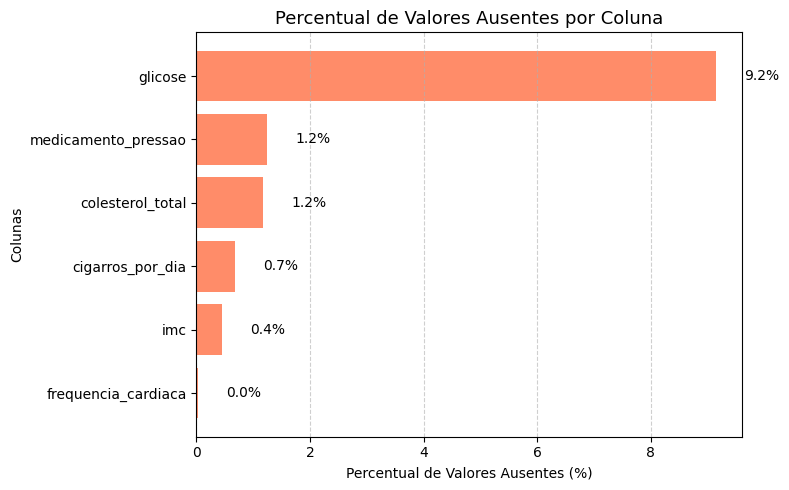

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Calcular o percentual de valores ausentes por coluna
missing = df.isnull().mean() * 100
missing = missing[missing > 0].sort_values(ascending=True)  # manter apenas colunas com NaN

# Plotar gráfico de barras horizontal
plt.figure(figsize=(8, 5))
plt.barh(missing.index, missing.values, color='#FF7043', alpha=0.8)
plt.title('Percentual de Valores Ausentes por Coluna', fontsize=13)
plt.xlabel('Percentual de Valores Ausentes (%)')
plt.ylabel('Colunas')
plt.grid(axis='x', linestyle='--', alpha=0.6)

# Mostrar valores no final de cada barra
for i, v in enumerate(missing.values):
    plt.text(v + 0.5, i, f"{v:.1f}%", va='center')

plt.tight_layout()
plt.show()


# **2.1- Substituindo valores nulos nas variáveis contínuas pela mediana**

In [ ]:
df.fillna({ # Substitui valores nulos nas variáveis contínuas pela mediana
    'glicose': df['glicose'].median(),
    'colesterol_total': df['colesterol_total'].median(),
    'cigarros_por_dia': df['cigarros_por_dia'].median(),
    'imc': df['imc'].median(),
    'frequencia_cardiaca': df['frequencia_cardiaca'].median(),
    'medicamento_pressao': 0 # Preenche BPMeds com 0 (quem não toma medicação)
}, inplace=True)

In [ ]:
df.duplicated().sum() #Check para as variaveis duplicadas

np.int64(0)

In [ ]:
# Verifica se ainda existem valores nulos
df.isnull().sum()

,0
sexo,0
idade,0
fumante_atualmente,0
cigarros_por_dia,0
medicamento_pressao,0
diabetes,0
colesterol_total,0
pressao_sistolica,0
pressao_diastolica,0
imc,0


In [ ]:
df.head()

,sexo,idade,fumante_atualmente,cigarros_por_dia,medicamento_pressao,diabetes,colesterol_total,pressao_sistolica,pressao_diastolica,imc,frequencia_cardiaca,glicose,risco_hipertensao
0,1,39,0,0.00,0.00,0,195.00,106.00,70.00,26.97,80.00,77.00,0
1,0,46,0,0.00,0.00,0,250.00,121.00,81.00,28.73,95.00,76.00,0
2,1,48,1,20.00,0.00,0,245.00,127.50,80.00,25.34,75.00,70.00,0
3,0,61,1,30.00,0.00,0,225.00,150.00,95.00,28.58,65.00,103.00,1
4,0,46,1,23.00,0.00,0,285.00,130.00,84.00,23.10,85.00,85.00,0


In [ ]:
# Para ver categorias únicas e frequência de colunas categóricas (como 'sexo')
df['sexo'].value_counts()

,count
sexo,
0,2420
1,1820


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# **3- Entender distribuição dos dados e EDA**

# **3.1- Histogramas para ver a forma da distribuição.**


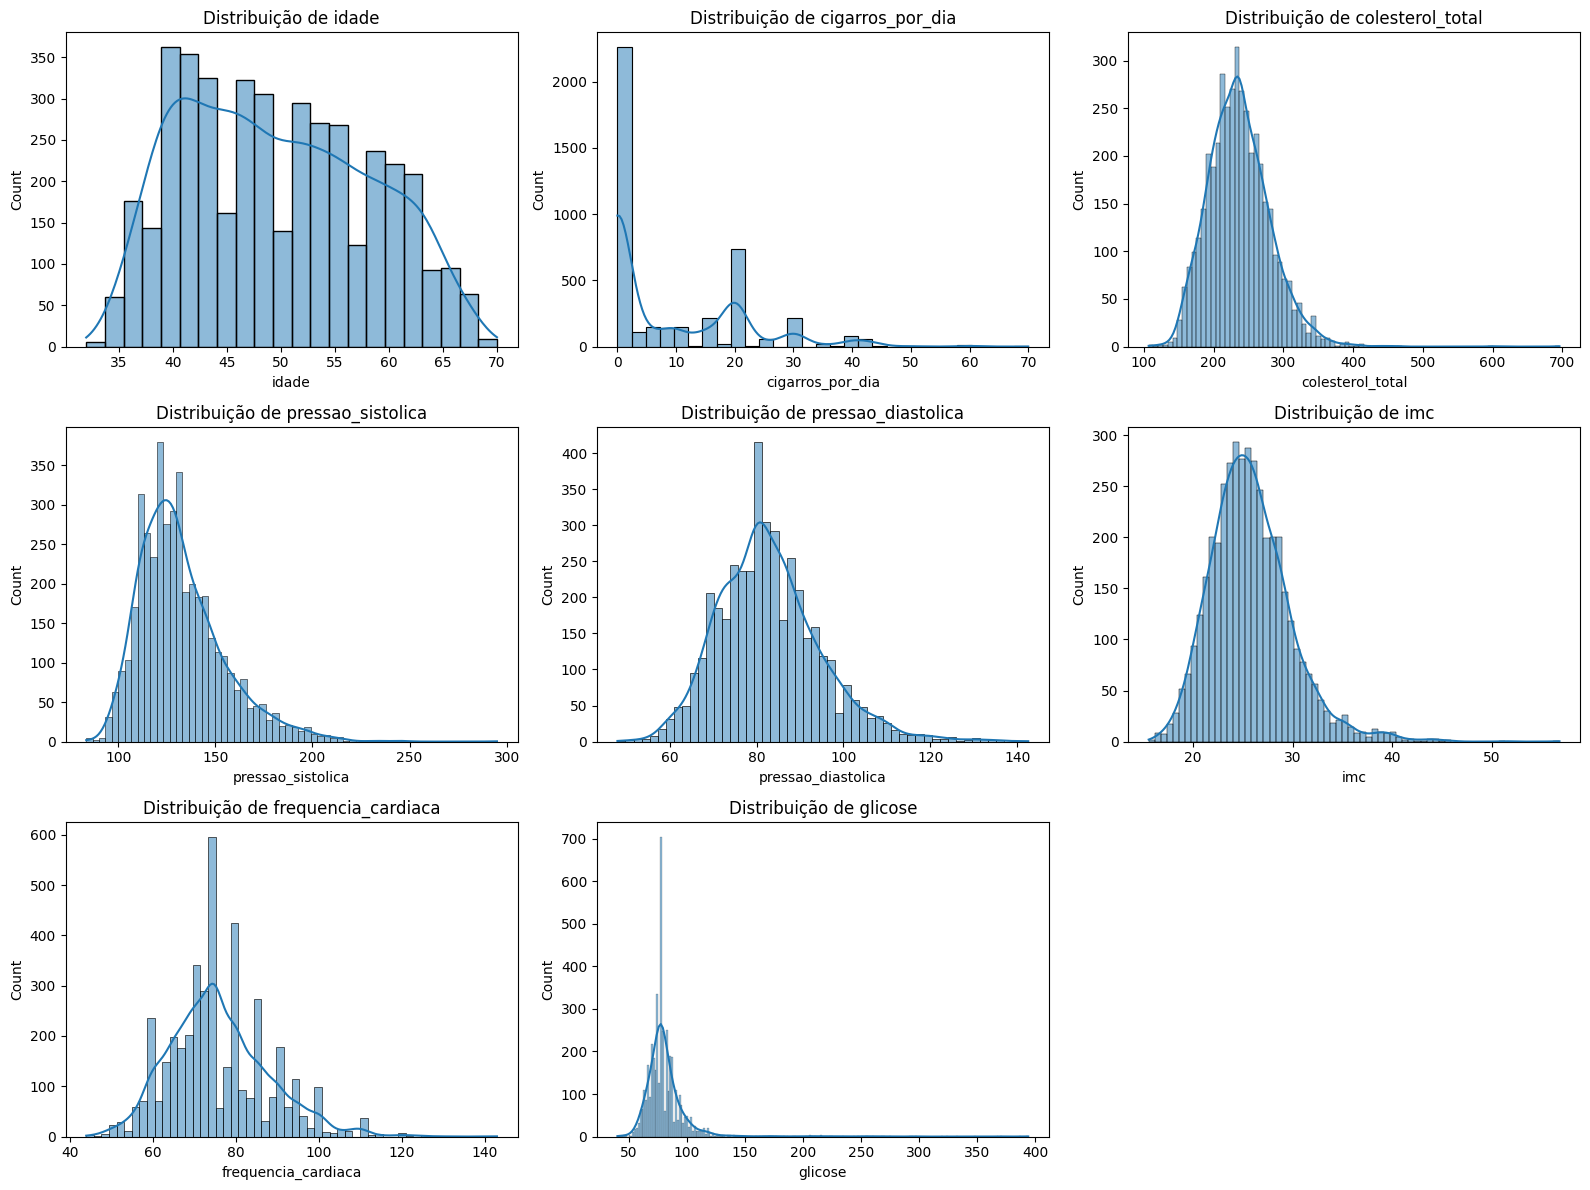

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

colunas_continuas = ['idade', 'cigarros_por_dia', 'colesterol_total', 'pressao_sistolica', 'pressao_diastolica', 'imc', 'frequencia_cardiaca', 'glicose']

plt.figure(figsize=(16, 12))
for i, col in enumerate(colunas_continuas, 1):
    plt.subplot(3, 3, i)
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribuição de {col}')
plt.tight_layout()
plt.show()


# **3.2- Boxplots para visualizar outliers**

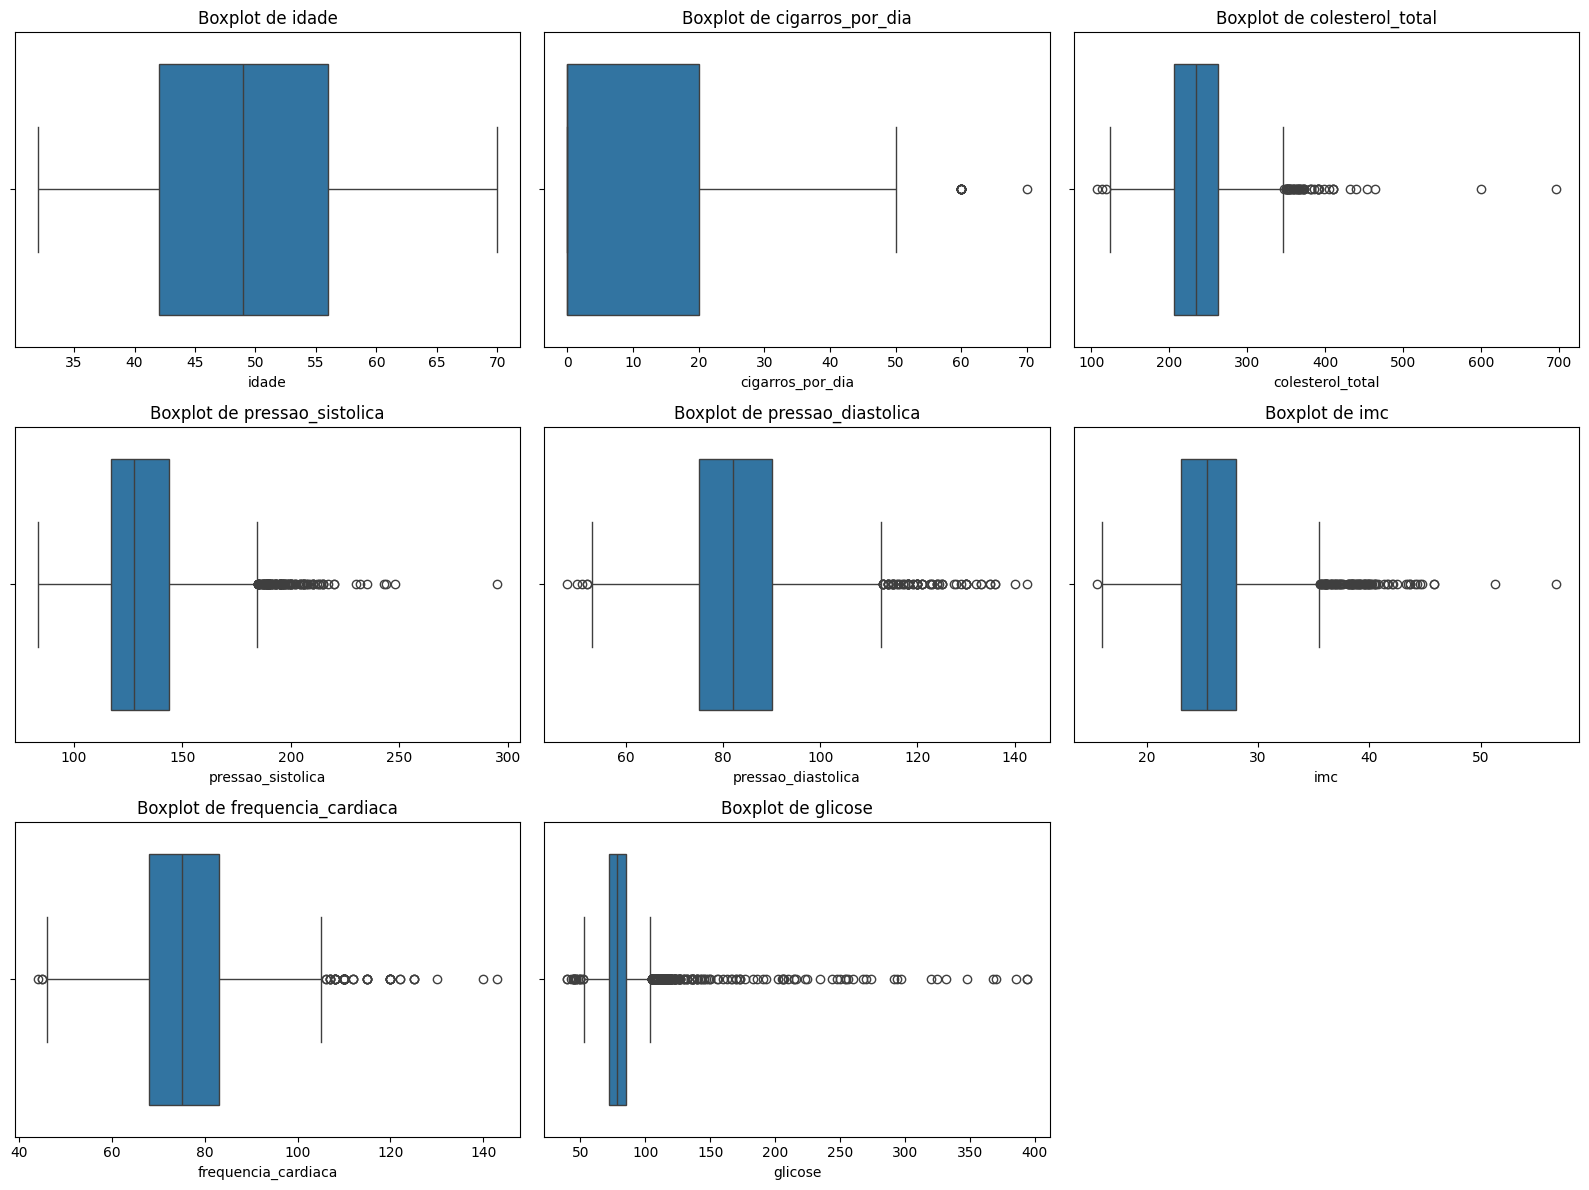

In [ ]:
plt.figure(figsize=(16, 12))
for i, col in enumerate(colunas_continuas, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot de {col}')
plt.tight_layout()
plt.show()


# **3.3- Distribuição da variável target (hipertensos vs. não-hipertensos)**

In [ ]:
# Para ver categorias únicas e frequência de colunas categóricas (como 'risco_hipertensao')
df['risco_hipertensao'].value_counts()

,count
risco_hipertensao,
0,2923
1,1317


In [ ]:
# Frequência absoluta + porcentagem
df['risco_hipertensao'].value_counts().to_frame('Frequência').assign(
    Porcentagem=lambda x: 100 * x['Frequência'] / x['Frequência'].sum()
)

,Frequência,Porcentagem
risco_hipertensao,,
0,2923,68.94
1,1317,31.06


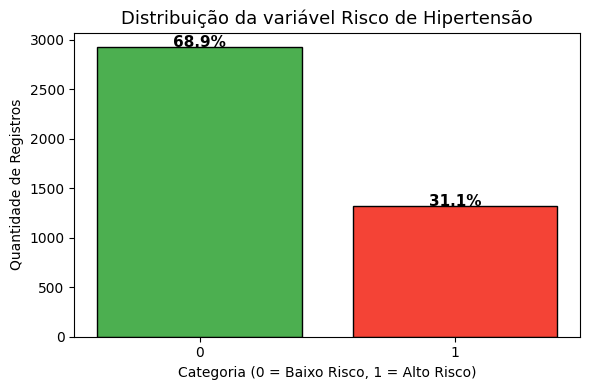

In [ ]:
import matplotlib.pyplot as plt

# Contagem e porcentagem
counts = df['risco_hipertensao'].value_counts()
percent = df['risco_hipertensao'].value_counts(normalize=True) * 100

# Criar o gráfico
plt.figure(figsize=(6,4))
bars = plt.bar(counts.index.astype(str), counts, color=['#4CAF50', '#F44336'], edgecolor='black')

# Adicionar rótulos nas barras
for bar, pct in zip(bars, percent):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 5,
             f'{pct:.1f}%', ha='center', fontsize=11, fontweight='bold')

# Título e eixos
plt.title('Distribuição da variável Risco de Hipertensão', fontsize=13)
plt.xlabel('Categoria (0 = Baixo Risco, 1 = Alto Risco)')
plt.ylabel('Quantidade de Registros')

plt.tight_layout()
plt.show()


# **3.4- Distribuição de idade pela variável target - Box plot comparativo**

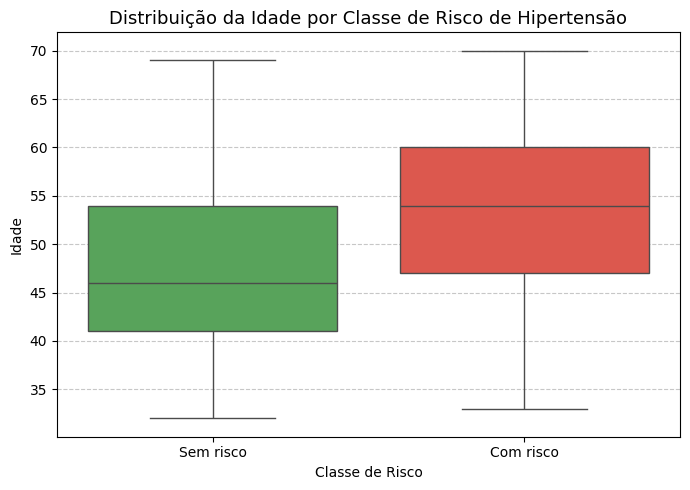

In [ ]:
# Criar uma cópia só para visualização
df_viz = df.copy()
df_viz['risco_hipertensao'] = df_viz['risco_hipertensao'].map({0: 'Sem risco', 1: 'Com risco'})

plt.figure(figsize=(7,5))
sns.boxplot(data=df_viz, x='risco_hipertensao', y='idade', palette=['#4CAF50', '#F44336'])

plt.title('Distribuição da Idade por Classe de Risco de Hipertensão', fontsize=13)
plt.xlabel('Classe de Risco')
plt.ylabel('Idade')

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


# **3.5- Distribuição de IMC estratificada - Histograma sobreposto**

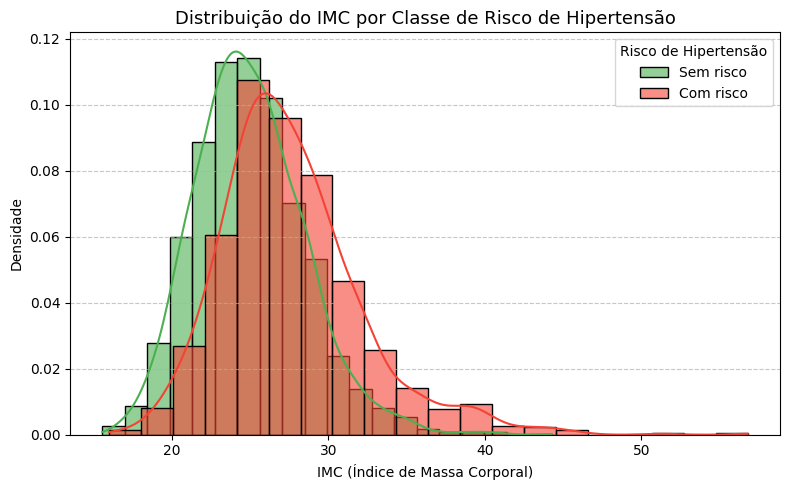

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,5))

# Plotar os histogramas sobrepostos
sns.histplot(
    data=df[df['risco_hipertensao'] == 0],
    x='imc',
    color='#4CAF50',
    label='Sem risco',
    kde=True,
    stat='density',
    bins=20,
    alpha=0.6
)

sns.histplot(
    data=df[df['risco_hipertensao'] == 1],
    x='imc',
    color='#F44336',
    label='Com risco',
    kde=True,
    stat='density',
    bins=20,
    alpha=0.6
)

plt.title('Distribuição do IMC por Classe de Risco de Hipertensão', fontsize=13)
plt.xlabel('IMC (Índice de Massa Corporal)')
plt.ylabel('Densidade')
plt.legend(title='Risco de Hipertensão')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


# **3.6- Análise de valores ausentes - Gráfico de barras horizontal**

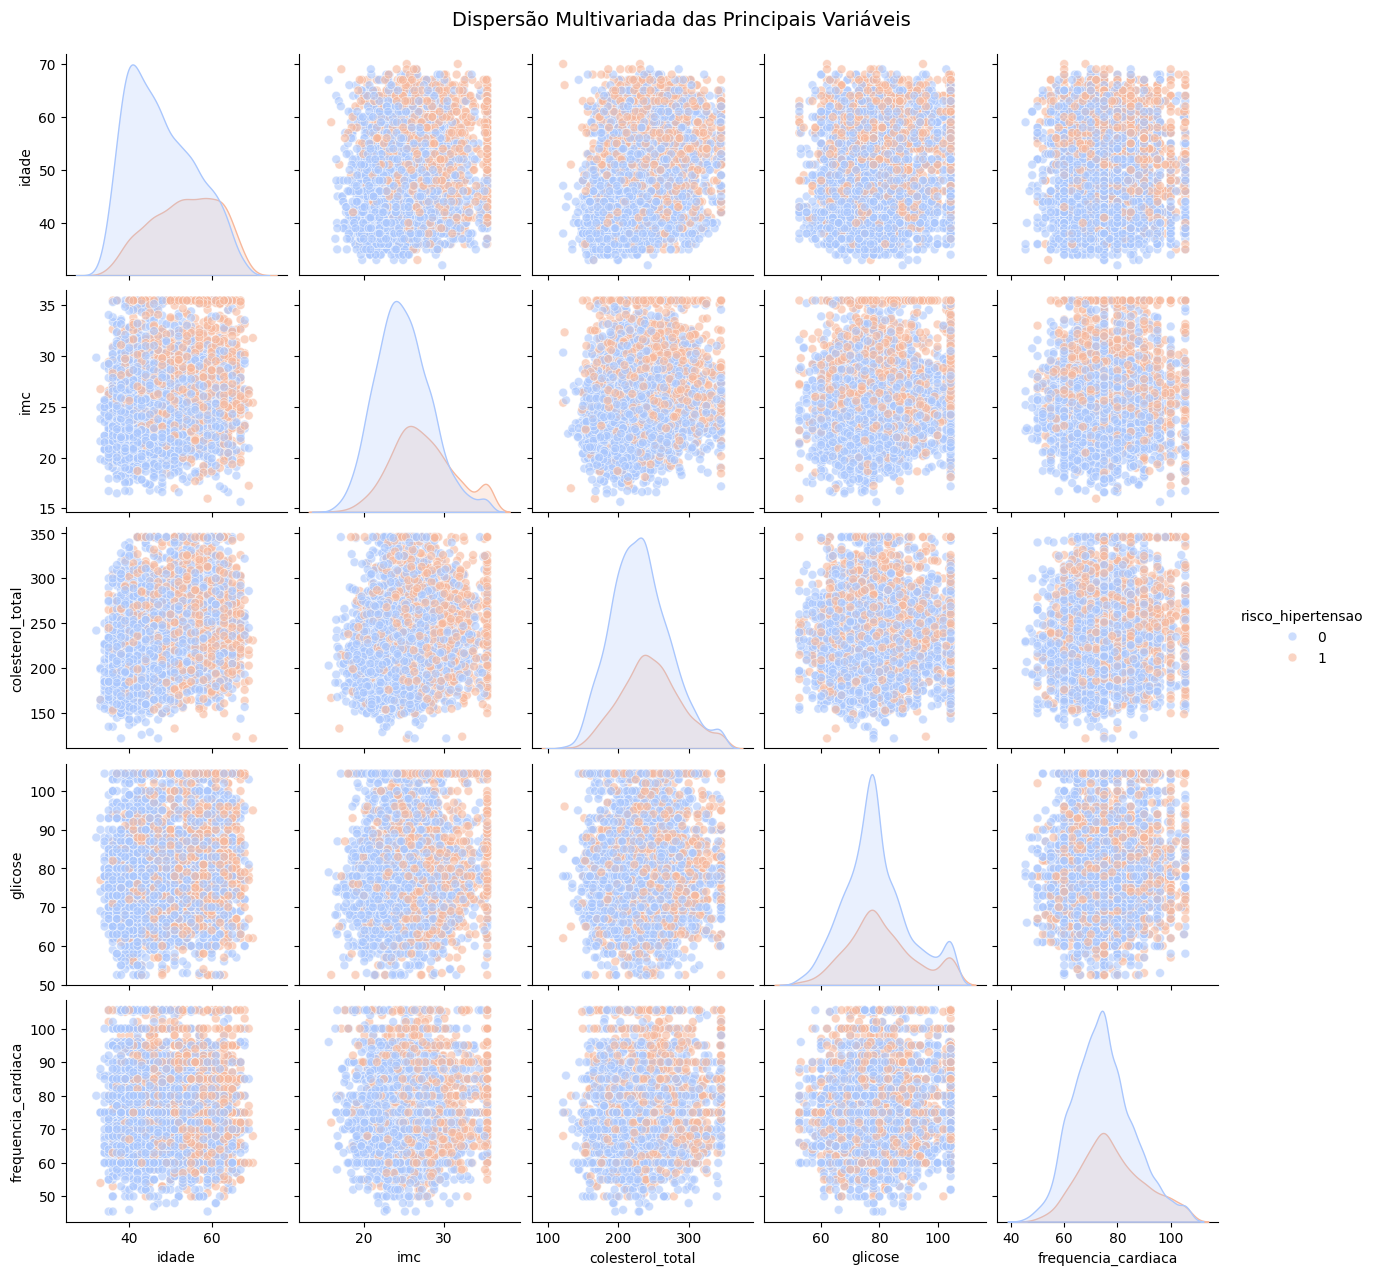

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Selecionar as principais variáveis numéricas
variaveis_principais = ['idade', 'imc', 'colesterol_total', 'glicose', 'frequencia_cardiaca', 'risco_hipertensao']

# Criar um subconjunto do DataFrame
df_subset = df[variaveis_principais]

# Pair Plot com estratificação pela variável alvo
sns.pairplot(
    df_subset,
    hue='risco_hipertensao',     # coloração pelas classes de risco
    diag_kind='kde',             # densidade na diagonal
    palette='coolwarm',          # cores para as classes
    plot_kws={'alpha': 0.6, 's': 40}  # transparência e tamanho dos pontos
)

plt.suptitle('Dispersão Multivariada das Principais Variáveis', y=1.02, fontsize=14)
plt.show()


# **4-Checar correlações com a variável Risk.**

# **4.1- Histogramas**

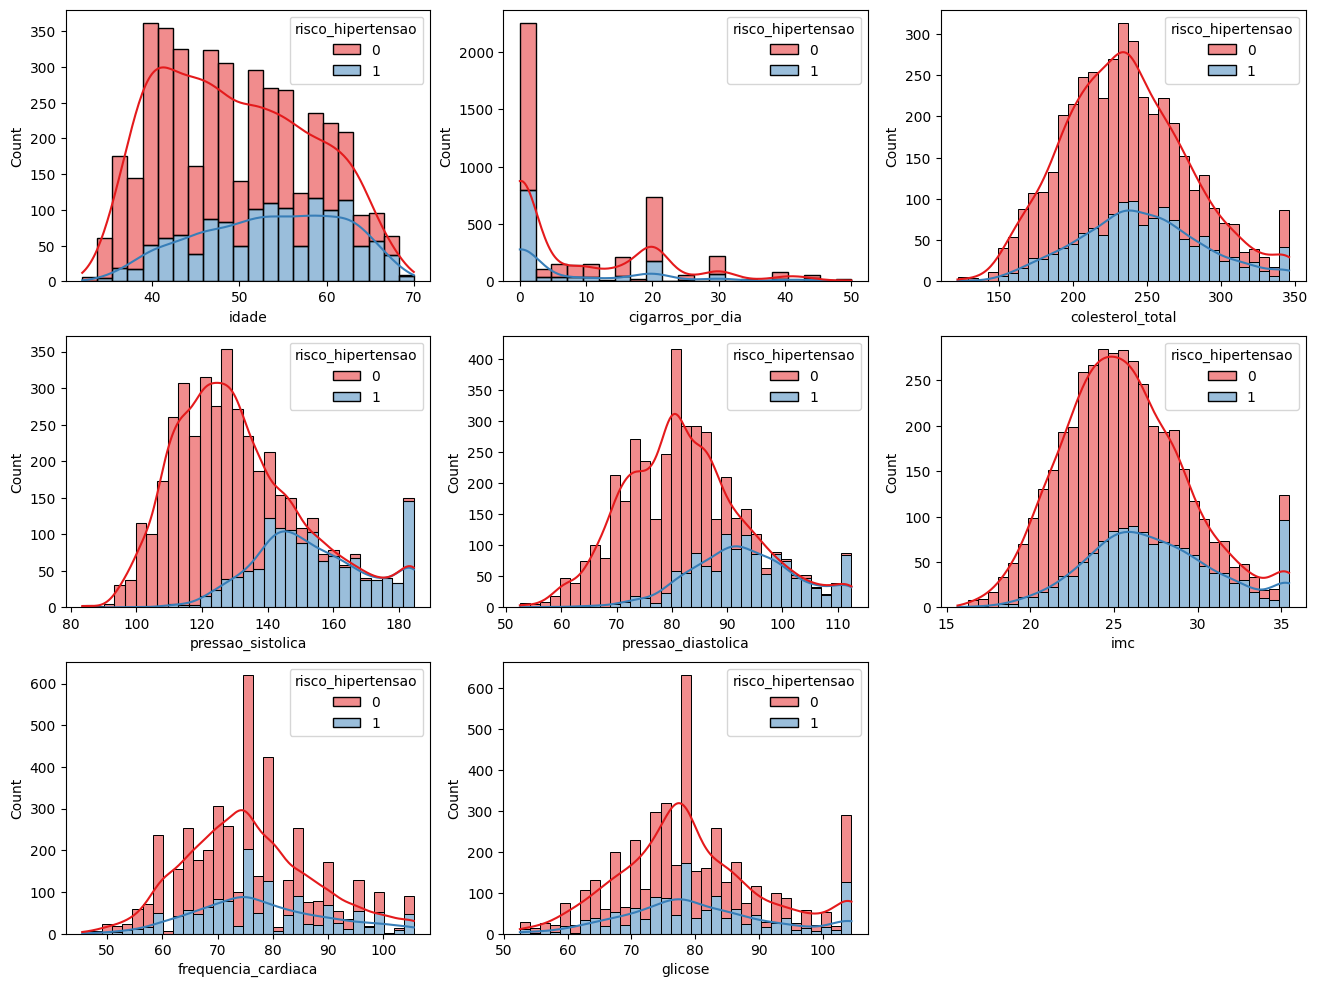

In [ ]:
plt.figure(figsize=(16,12),facecolor='white')
plotnumber=1

for coluna in colunas_continuas [0:]:
    ax = plt.subplot(3, 3, plotnumber)
    sns.histplot(data=df, x=coluna, hue='risco_hipertensao', kde=True, multiple='stack', palette='Set1')
    plt.xlabel(coluna, fontsize=10)
    plotnumber += 1

# **4.2- Mapa de calor**

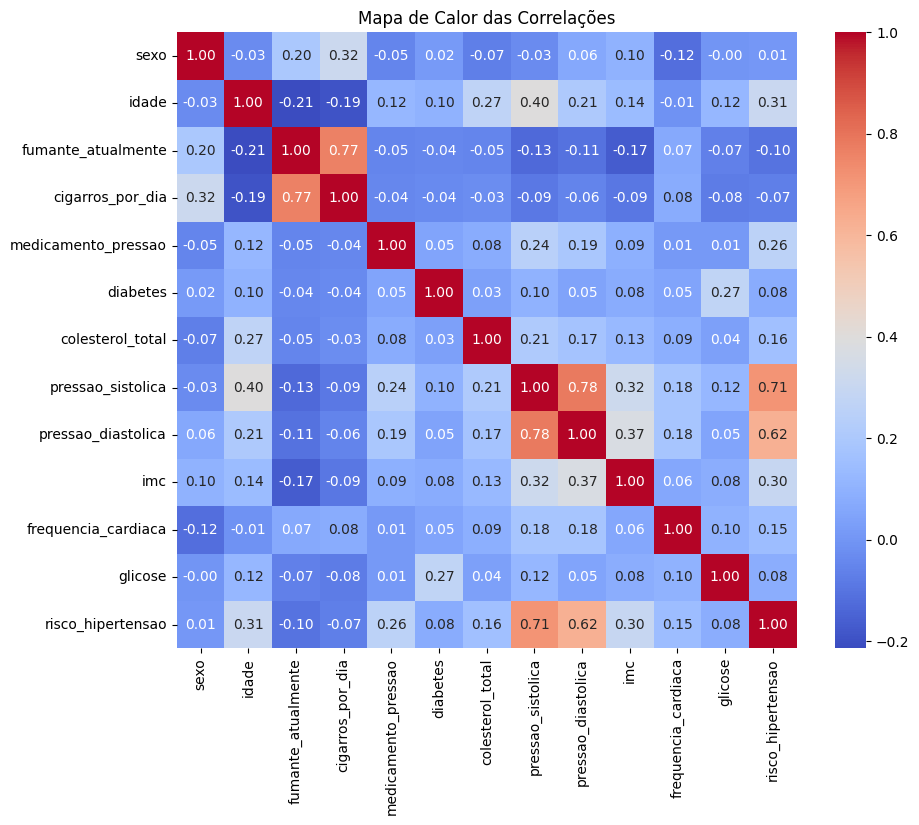

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Mapa de Calor das Correlações")
plt.show()

# **4.3- Correlação das colunas com a coluna risco_hipertensao**

In [ ]:
correlacoes = df.corr(numeric_only=True)['risco_hipertensao'].sort_values(ascending=False)
print(correlacoes)

risco_hipertensao      1.00
pressao_sistolica      0.71
pressao_diastolica     0.62
idade                  0.31
imc                    0.30
medicamento_pressao    0.26
colesterol_total       0.16
frequencia_cardiaca    0.15
glicose                0.08
diabetes               0.08
sexo                   0.01
cigarros_por_dia      -0.07
fumante_atualmente    -0.10
Name: risco_hipertensao, dtype: float64


# **5- Suavizando Outliers utilizando o método IQR**

In [ ]:
# função para suavizar outliers usando o método IQR

def suavizacao_outliers(df, columns):

   # percorrendo cada coluna
    for col in columns:
        q1 = df[col].quantile(0.25)
        q3 = df[col].quantile(0.75)
        iqr = q3 - q1
        limite_inferior = float(q1 - 1.5 * iqr)
        limite_superior = float(q3 + 1.5 * iqr)

        # substituindo outliers por limites
        df[col] = np.where(df[col] < limite_inferior, limite_inferior, df[col])
        df[col] = np.where(df[col] > limite_superior, limite_superior, df[col])

    return df


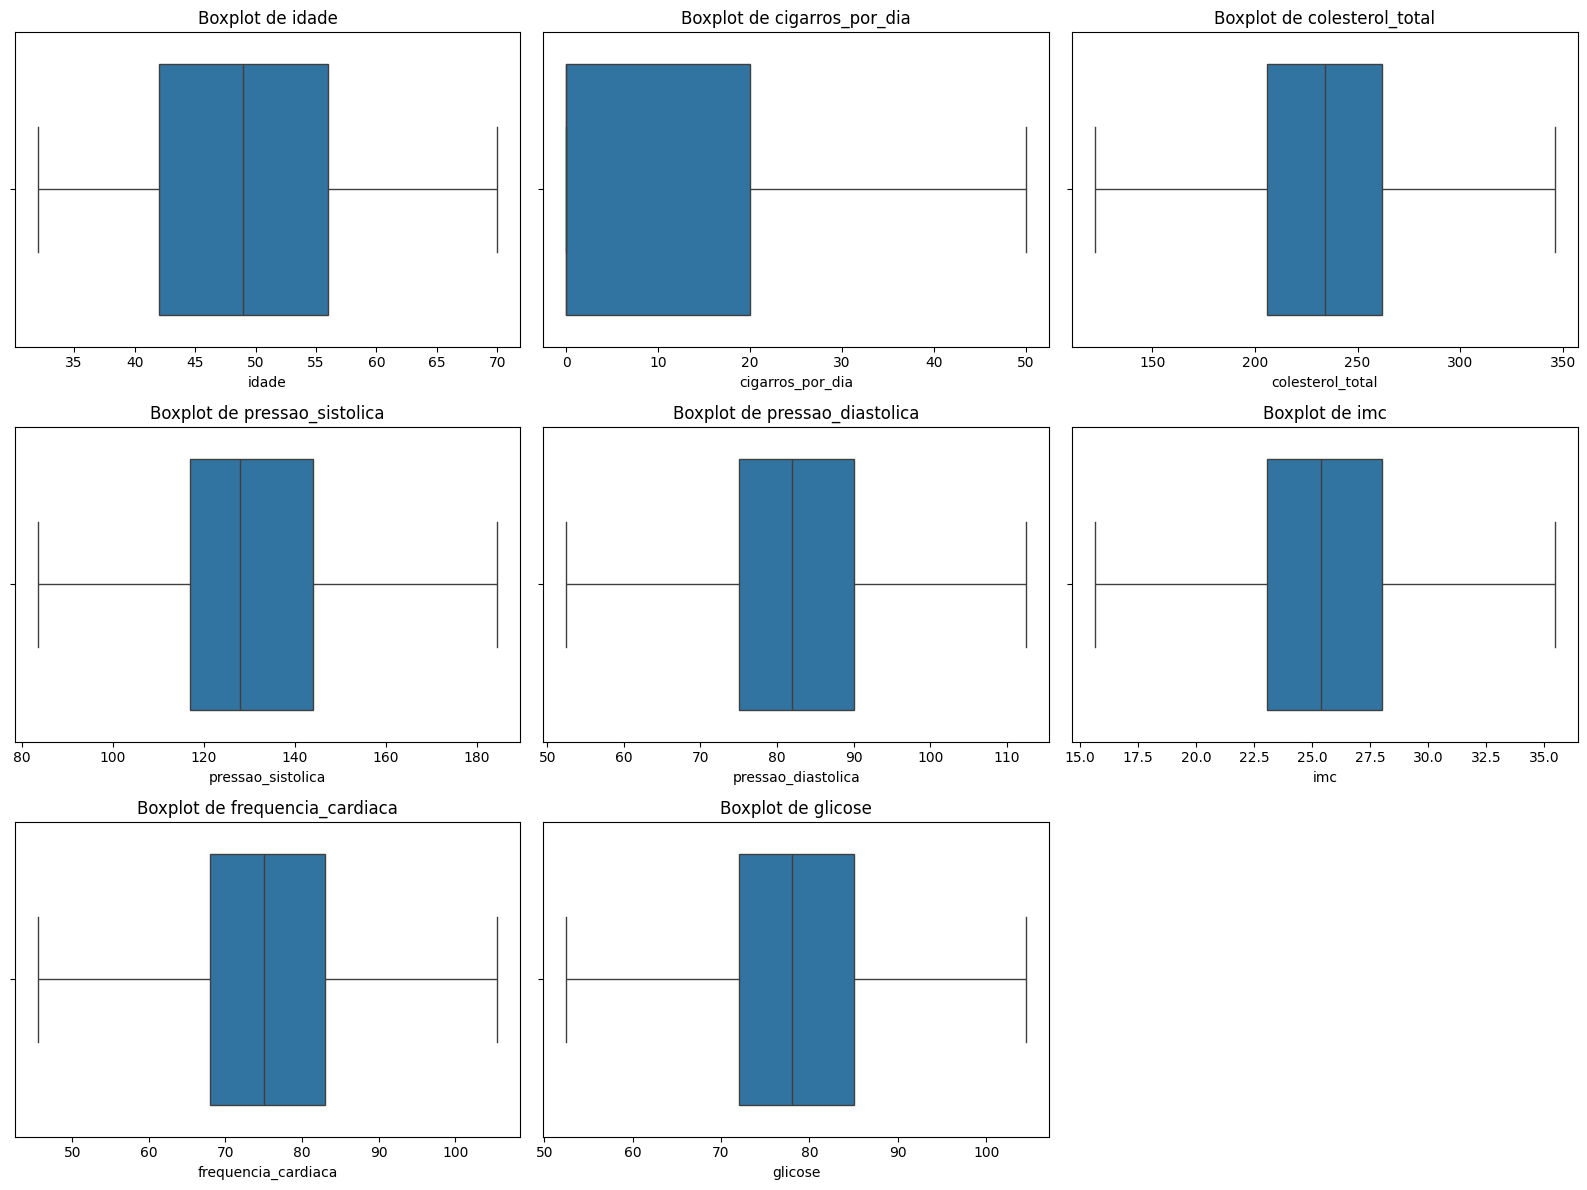

In [ ]:
df = suavizacao_outliers(df, colunas_continuas)

plt.figure(figsize=(16, 12))
for i, col in enumerate(colunas_continuas, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot de {col}')
plt.tight_layout()
plt.show()

# **6-Divisão dos Dados para Treino e Teste**

In [ ]:
from sklearn.model_selection import train_test_split

# Separando variáveis independentes (X) e alvo (y)
X = df.drop('risco_hipertensao', axis=1)
y = df['risco_hipertensao']

# Divisão em treino e teste (70% treino, 30% teste) com estratificação
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=42, stratify=y)

# Verificando os tamanhos
print(f'Treino: {X_train.shape}, Teste: {X_test.shape}')

Treino: (2968, 12), Teste: (1272, 12)


In [ ]:
X_train.head()

,sexo,idade,fumante_atualmente,cigarros_por_dia,medicamento_pressao,diabetes,colesterol_total,pressao_sistolica,pressao_diastolica,imc,frequencia_cardiaca,glicose
2779,1,43.00,0,0.00,1.00,0,210.00,181.00,97.50,21.83,75.00,55.00
3546,0,54.00,0,0.00,0.00,0,241.00,106.00,77.00,27.64,78.00,74.00
2241,1,45.00,1,20.00,0.00,0,239.00,116.00,68.00,26.00,78.00,79.00
1516,1,36.00,0,0.00,0.00,0,219.00,121.00,66.00,20.86,74.00,76.00
1055,1,67.00,1,9.00,0.00,0,245.00,126.00,68.00,29.04,70.00,94.00


# **7 - Padronização dos Dados**
Feito após a divisão dos dados para que não aconteça vazamentos(Data Leakage)

In [ ]:
from sklearn.preprocessing import StandardScaler

# Instanciando o scaler
scaler = StandardScaler()

# Padronizando apenas as colunas numéricas contínuas
X_train[colunas_continuas] = scaler.fit_transform(X_train[colunas_continuas])
X_test[colunas_continuas] = scaler.transform(X_test[colunas_continuas])

# Verificando o resultado
X_train.head()

,sexo,idade,fumante_atualmente,cigarros_por_dia,medicamento_pressao,diabetes,colesterol_total,pressao_sistolica,pressao_diastolica,imc,frequencia_cardiaca,glicose
2779,1,-0.75,0,-0.75,1.00,0,-0.61,2.40,1.30,-1.02,-0.05,-2.14
3546,0,0.53,0,-0.75,0.00,0,0.12,-1.27,-0.50,0.50,0.21,-0.48
2241,1,-0.52,1,0.95,0.00,0,0.07,-0.78,-1.29,0.07,0.21,-0.05
1516,1,-1.56,0,-0.75,0.00,0,-0.40,-0.53,-1.46,-1.27,-0.13,-0.31
1055,1,2.04,1,0.02,0.00,0,0.22,-0.29,-1.29,0.87,-0.48,1.25


In [ ]:
X_test.head()

,sexo,idade,fumante_atualmente,cigarros_por_dia,medicamento_pressao,diabetes,colesterol_total,pressao_sistolica,pressao_diastolica,imc,frequencia_cardiaca,glicose
526,0,-0.40,1,-0.66,0.00,0,0.12,-0.09,-0.06,2.39,-1.16,1.17
3973,0,1.46,0,-0.75,0.00,0,1.73,0.69,-0.02,0.74,-0.99,-0.75
937,1,-0.75,0,-0.75,0.00,0,0.57,-0.14,0.64,-0.11,-0.48,-1.53
2269,1,-0.75,0,-0.75,0.00,0,-1.35,-0.34,-0.23,-0.70,-1.08,-0.14
2875,1,-0.98,1,0.95,0.00,0,0.67,-0.27,-0.06,-0.46,-0.05,-0.14


# **8- Oversampling (apenas no conjunto de treino)**

Usei oversampling para balancear as classes e evitar que o modelo favoreça a classe majoritária (Risk = 0), melhorando o desempenho na detecção de casos positivos (Risk = 1).

In [ ]:
from imblearn.over_sampling import RandomOverSampler
import pandas as pd

# 1. Ver distribuição de y_train ANTES do oversampling
print("Distribuição de y_train antes do Oversampling:")
print(pd.Series(y_train).value_counts())

# 2. Aplicar o oversampling SOMENTE em X_train e y_train
oversampler = RandomOverSampler(random_state=42)
X_train_resampled, y_train_resampled = oversampler.fit_resample(X_train, y_train)

# 3. Ver distribuição de y_train DEPOIS do oversampling
print("\nDistribuição de y_train após o Oversampling:")
print(pd.Series(y_train_resampled).value_counts())


Distribuição de y_train antes do Oversampling:
risco_hipertensao
0    2046
1     922
Name: count, dtype: int64

Distribuição de y_train após o Oversampling:
risco_hipertensao
1    2046
0    2046
Name: count, dtype: int64


# **9- Escolha do Modelo e Treinamento e Avaliação**

# **9.1- Regressão Logística**

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report, roc_auc_score

# 1. Criar e treinar o modelo
log_model = LogisticRegression(random_state=42, max_iter=1000)
log_model.fit(X_train, y_train)

# 2. Fazer previsões
y_pred_rl = log_model.predict(X_test)

AUC: 0.95
Precision: 0.85
F1-score: 0.82
Recall: 0.79

Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.91      0.94      0.92       877
           1       0.85      0.79      0.82       395

    accuracy                           0.89      1272
   macro avg       0.88      0.86      0.87      1272
weighted avg       0.89      0.89      0.89      1272



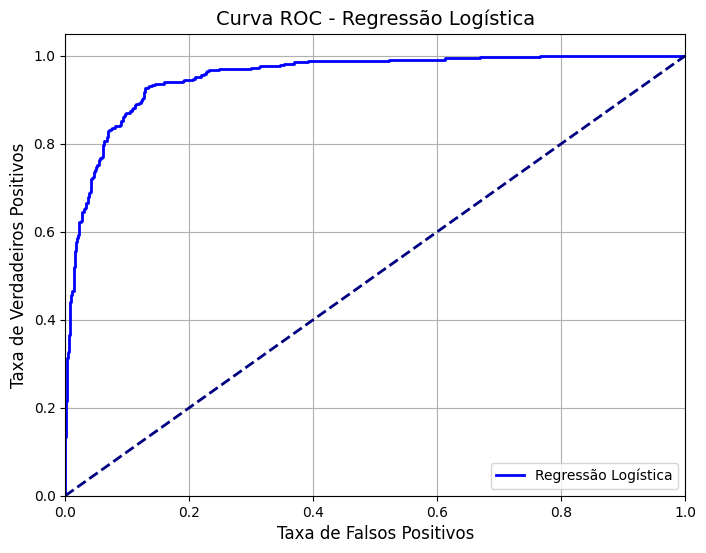


True Positive (TP): 311
True Negative (TN): 824
False Positive (FP): 53
False Negative (FN): 84

Matriz de Confusão:
[[824  53]
 [ 84 311]]
Acurácia da Detecção: 89.23%
Erro de Detecção: 10.77%


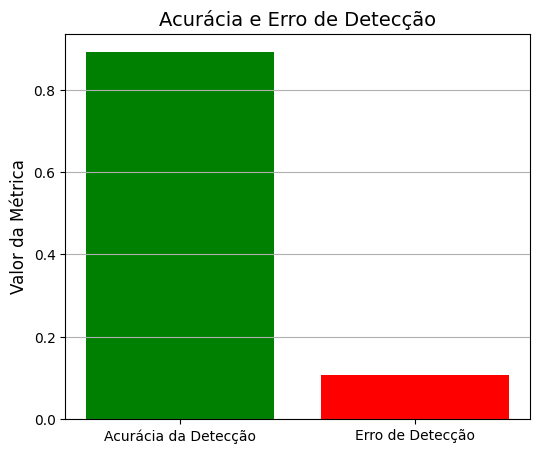

In [ ]:
from sklearn.metrics import roc_auc_score, roc_curve, precision_score, f1_score, recall_score, classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt

# AUC
y_prob_rl = log_model.predict_proba(X_test)[:, 1]
auc = roc_auc_score(y_test, y_prob_rl)

# Precision
precision = precision_score(y_test, y_pred_rl)

# F1-score
f1 = f1_score(y_test, y_pred_rl)

# Recall
recall = recall_score(y_test, y_pred_rl)

# Classification Report
class_report = classification_report(y_test, y_pred_rl)

# Exibindo as métricas com tamanhos de letra maiores
print(f"AUC: {auc:.2f}")
print(f"Precision: {precision:.2f}")
print(f"F1-score: {f1:.2f}")
print(f"Recall: {recall:.2f}")
print("\nRelatório de Classificação:\n", class_report)

# Curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_prob_rl)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='Regressão Logística')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taxa de Falsos Positivos', fontsize=12)
plt.ylabel('Taxa de Verdadeiros Positivos', fontsize=12)
plt.title('Curva ROC - Regressão Logística', fontsize=14)
plt.legend(loc="lower right", fontsize=10)
plt.tick_params(labelsize=10)
plt.grid(True)
plt.show()

# Matriz de Confusão
conf_matrix = confusion_matrix(y_test, y_pred_rl)
TP = conf_matrix[1, 1]
TN = conf_matrix[0, 0]
FP = conf_matrix[0, 1]
FN = conf_matrix[1, 0]

print(f"\nTrue Positive (TP): {TP}")
print(f"True Negative (TN): {TN}")
print(f"False Positive (FP): {FP}")
print(f"False Negative (FN): {FN}")

# Acurácia e erro
detection_accuracy = accuracy_score(y_test, y_pred_rl)
detection_error = 1 - detection_accuracy

print(f"\nMatriz de Confusão:\n{conf_matrix}")
print(f"Acurácia da Detecção: {detection_accuracy:.2%}")
print(f"Erro de Detecção: {detection_error:.2%}")

# Ajustando o limiar de classificação
threshold = 0.5
y_pred1 = (y_prob_rl > threshold).astype(int)
accuracy = accuracy_score(y_test, y_pred1)
error = 1 - accuracy

# Gráfico de barras com letras ajustadas
labels = ['Acurácia da Detecção', 'Erro de Detecção']
values = [accuracy, error]

plt.figure(figsize=(6, 5))
plt.bar(labels, values, color=['green', 'red'])
plt.ylabel('Valor da Métrica', fontsize=12)
plt.title('Acurácia e Erro de Detecção', fontsize=14)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='y')
plt.show()

# **9.2- Árvore de Decisão**

In [ ]:
#Criando o modelo
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()

In [ ]:
#Treinando o Modelo
dt.fit(X_train,y_train)

DecisionTreeClassifier()

AUC: 0.83
Precisão: 0.75
Revocação (Recall): 0.78
F1-Score: 0.77

Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.90      0.89      0.89       877
           1       0.75      0.78      0.77       395

    accuracy                           0.85      1272
   macro avg       0.83      0.83      0.83      1272
weighted avg       0.85      0.85      0.85      1272



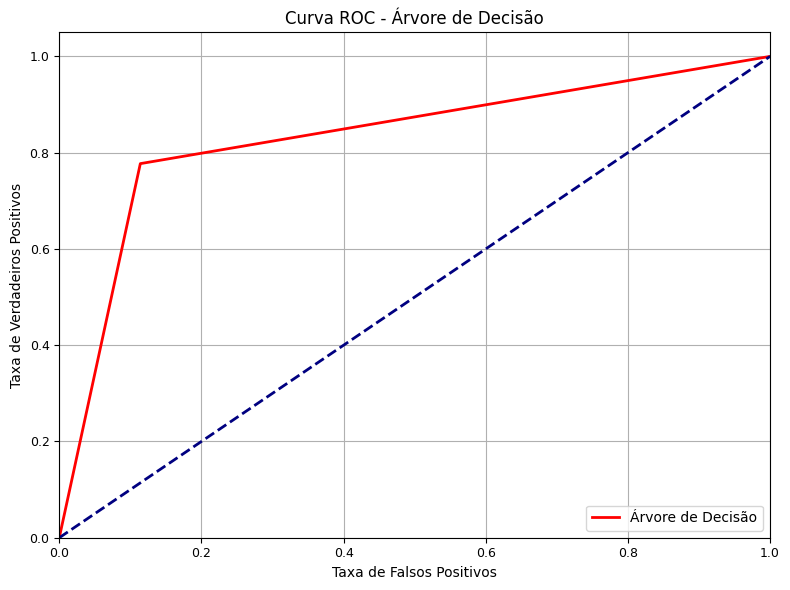

Verdadeiros Positivos (TP): 307
Verdadeiros Negativos (TN): 777
Falsos Positivos (FP): 100
Falsos Negativos (FN): 88

Matriz de Confusão:
[[777 100]
 [ 88 307]]
Acurácia da Detecção: 85.22%
Erro de Detecção: 14.78%


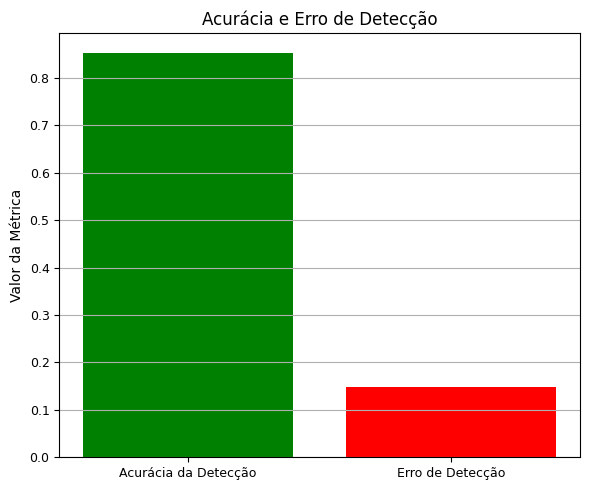

In [ ]:
from sklearn.metrics import roc_auc_score, roc_curve, precision_score, recall_score, f1_score, classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
from sklearn import metrics

# Probabilidades previstas pela Árvore de Decisão
y_prob_ad = dt.predict_proba(X_test)[:, 1]

# AUC (Área sob a curva ROC)
auc = roc_auc_score(y_test, y_prob_ad)

# Métricas principais
y_pred_ad = dt.predict(X_test)
precision = precision_score(y_test, y_pred_ad)
recall = recall_score(y_test, y_pred_ad)
f1 = f1_score(y_test, y_pred_ad)

# Relatório de Classificação
report = classification_report(y_test, y_pred_ad)
print(f"AUC: {auc:.2f}")
print(f"Precisão: {precision:.2f}")
print(f"Revocação (Recall): {recall:.2f}")
print(f"F1-Score: {f1:.2f}")
print("\nRelatório de Classificação:\n", report)

# Curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_prob_ad)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='red', lw=2, label='Árvore de Decisão')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taxa de Falsos Positivos', fontsize=10)
plt.ylabel('Taxa de Verdadeiros Positivos', fontsize=10)
plt.title('Curva ROC - Árvore de Decisão', fontsize=12)
plt.legend(loc="lower right", fontsize=10)
plt.xticks(fontsize=9)
plt.yticks(fontsize=9)
plt.grid(True)
plt.tight_layout()
plt.show()

# Matriz de Confusão
conf_matrix = confusion_matrix(y_test, y_pred_ad)
TP = conf_matrix[1, 1]
TN = conf_matrix[0, 0]
FP = conf_matrix[0, 1]
FN = conf_matrix[1, 0]

# Impressão dos valores
print(f"Verdadeiros Positivos (TP): {TP}")
print(f"Verdadeiros Negativos (TN): {TN}")
print(f"Falsos Positivos (FP): {FP}")
print(f"Falsos Negativos (FN): {FN}")

# Acurácia e Erro
detection_accuracy = accuracy_score(y_test, y_pred_ad)
detection_error = 1 - detection_accuracy

print(f"\nMatriz de Confusão:\n{conf_matrix}")
print(f"Acurácia da Detecção: {detection_accuracy:.2%}")
print(f"Erro de Detecção: {detection_error:.2%}")

# Definindo limiar manual (opcional)
threshold = 0.5
y_pred3 = (y_prob_ad > threshold).astype(int)

# Acurácia e erro com limiar manual
accuracy = metrics.accuracy_score(y_test, y_pred3)
error = 1 - accuracy

# Gráfico de barras
labels = ['Acurácia da Detecção', 'Erro de Detecção']
values = [accuracy, error]

plt.figure(figsize=(6, 5))
plt.bar(labels, values, color=['green', 'red'])
plt.ylabel('Valor da Métrica', fontsize=10)
plt.title('Acurácia e Erro de Detecção', fontsize=12)
plt.xticks(fontsize=9)
plt.yticks(fontsize=9)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


# **9.3- Randon Forest**

AUC: 0.95
Precisão: 0.83
Revocação (Recall): 0.87
F1-Score: 0.85

Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.94      0.92      0.93       877
           1       0.83      0.87      0.85       395

    accuracy                           0.91      1272
   macro avg       0.89      0.90      0.89      1272
weighted avg       0.91      0.91      0.91      1272



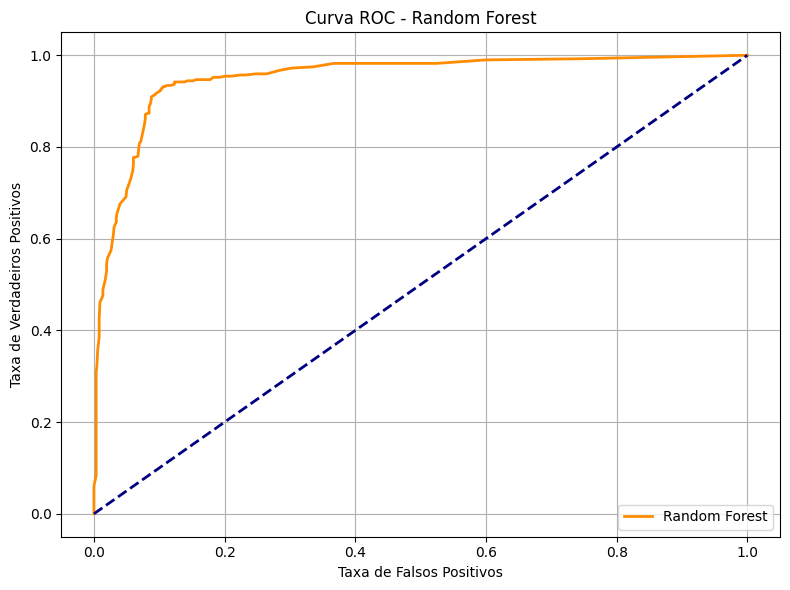

Verdadeiros Positivos (TP): 344
Verdadeiros Negativos (TN): 808
Falsos Positivos (FP): 69
Falsos Negativos (FN): 51

Matriz de Confusão:
[[808  69]
 [ 51 344]]
Acurácia da Detecção: 90.57%
Erro de Detecção: 9.43%


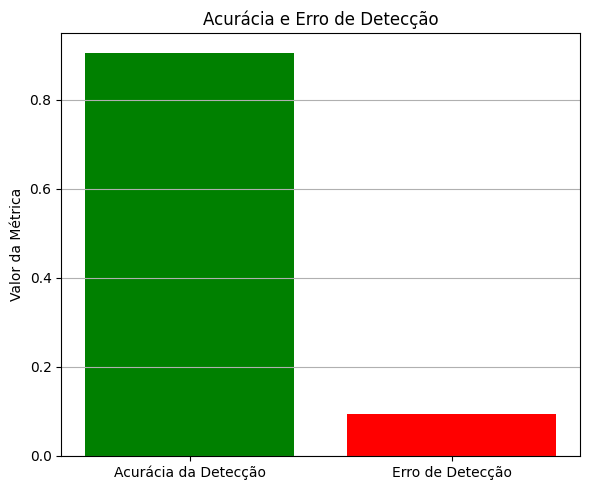

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, roc_curve, precision_score, recall_score, f1_score, classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
from sklearn import metrics

# Treinamento do modelo
rf = RandomForestClassifier(random_state=42, n_estimators=100)
rf.fit(X_train, y_train)

# Probabilidades previstas
y_prob_rf = rf.predict_proba(X_test)[:, 1]

# AUC
auc = roc_auc_score(y_test, y_prob_rf)

# Previsões
y_pred_rf = rf.predict(X_test)

# Métricas principais
precision = precision_score(y_test, y_pred_rf)
recall = recall_score(y_test, y_pred_rf)
f1 = f1_score(y_test, y_pred_rf)

# Relatório de Classificação
report = classification_report(y_test, y_pred_rf)
print(f"AUC: {auc:.2f}")
print(f"Precisão: {precision:.2f}")
print(f"Revocação (Recall): {recall:.2f}")
print(f"F1-Score: {f1:.2f}")
print("\nRelatório de Classificação:\n", report)

# Curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_prob_rf)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='Random Forest')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('Taxa de Falsos Positivos', fontsize=10)
plt.ylabel('Taxa de Verdadeiros Positivos', fontsize=10)
plt.title('Curva ROC - Random Forest', fontsize=12)
plt.legend(loc="lower right", fontsize=10)
plt.grid(True)
plt.tight_layout()
plt.show()

# Matriz de Confusão
conf_matrix = confusion_matrix(y_test, y_pred_rf)
TP = conf_matrix[1, 1]
TN = conf_matrix[0, 0]
FP = conf_matrix[0, 1]
FN = conf_matrix[1, 0]

print(f"Verdadeiros Positivos (TP): {TP}")
print(f"Verdadeiros Negativos (TN): {TN}")
print(f"Falsos Positivos (FP): {FP}")
print(f"Falsos Negativos (FN): {FN}")

# Acurácia e Erro
detection_accuracy = accuracy_score(y_test, y_pred_rf)
detection_error = 1 - detection_accuracy

print(f"\nMatriz de Confusão:\n{conf_matrix}")
print(f"Acurácia da Detecção: {detection_accuracy:.2%}")
print(f"Erro de Detecção: {detection_error:.2%}")

# Gráfico de barras
threshold = 0.5
y_pred_thresh = (y_prob_rf > threshold).astype(int)
accuracy = metrics.accuracy_score(y_test, y_pred_thresh)
error = 1 - accuracy

labels = ['Acurácia da Detecção', 'Erro de Detecção']
values = [accuracy, error]

plt.figure(figsize=(6, 5))
plt.bar(labels, values, color=['green', 'red'])
plt.ylabel('Valor da Métrica', fontsize=10)
plt.title('Acurácia e Erro de Detecção', fontsize=12)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


# **9.4- Gradient Boosting**

Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.94      0.92      0.93       877
           1       0.83      0.87      0.85       395

    accuracy                           0.90      1272
   macro avg       0.88      0.89      0.89      1272
weighted avg       0.90      0.90      0.90      1272

Matriz de Confusão:
 [[806  71]
 [ 52 343]]
AUC: 0.96
Acurácia: 90.33%


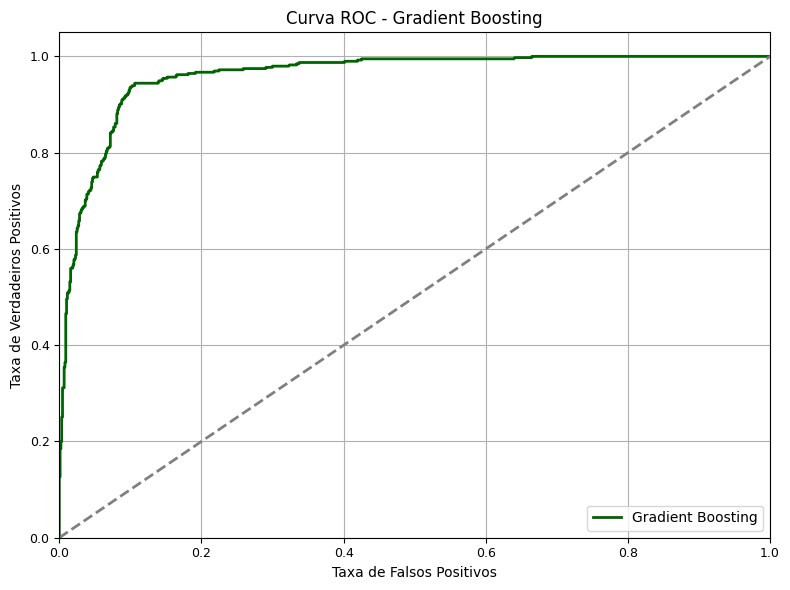

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, accuracy_score
import matplotlib.pyplot as plt

# 1. Escalar os dados (boa prática)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 2. Criar e treinar o modelo
gb = GradientBoostingClassifier()
gb.fit(X_train_scaled, y_train)

# 3. Previsões
y_pred_gb = gb.predict(X_test_scaled)
y_prob_gb = gb.predict_proba(X_test_scaled)[:, 1]

# 4. Avaliação
print("Relatório de Classificação:\n", classification_report(y_test, y_pred_gb))
print("Matriz de Confusão:\n", confusion_matrix(y_test, y_pred_gb))
print(f"AUC: {roc_auc_score(y_test, y_prob_gb):.2f}")
print(f"Acurácia: {accuracy_score(y_test, y_pred_gb):.2%}")

# 5. Curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_prob_gb)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkgreen', lw=2, label='Gradient Boosting')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taxa de Falsos Positivos', fontsize=10)
plt.ylabel('Taxa de Verdadeiros Positivos', fontsize=10)
plt.title('Curva ROC - Gradient Boosting', fontsize=12)
plt.legend(loc="lower right", fontsize=10)
plt.xticks(fontsize=9)
plt.yticks(fontsize=9)
plt.grid(True)
plt.tight_layout()
plt.show()


# **9.5- XGBOOSTING**

Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.92      0.92      0.92       877
           1       0.81      0.81      0.81       395

    accuracy                           0.88      1272
   macro avg       0.87      0.86      0.86      1272
weighted avg       0.88      0.88      0.88      1272

Matriz de Confusão:
 [[804  73]
 [ 74 321]]
AUC: 0.95
Acurácia: 88.44%


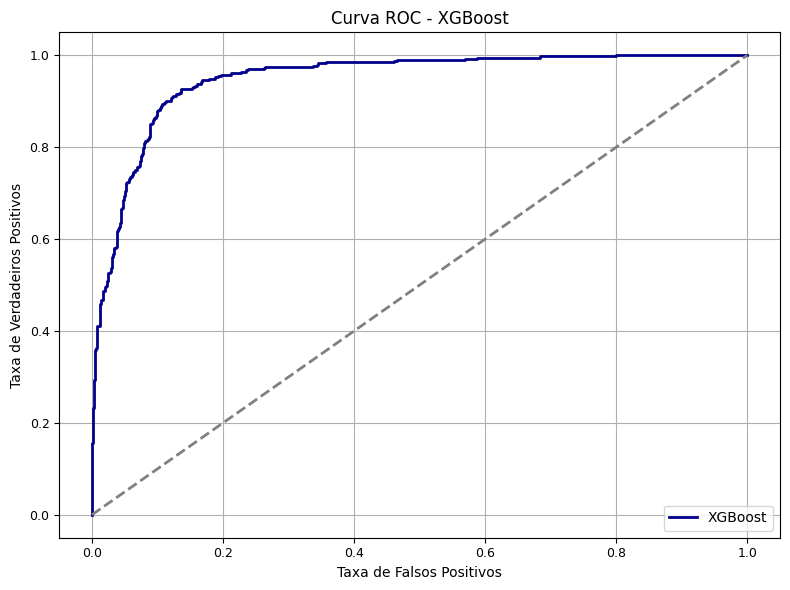

Verdadeiros Positivos (TP): 321
Verdadeiros Negativos (TN): 804
Falsos Positivos (FP): 73
Falsos Negativos (FN): 74
Acurácia da Detecção: 88.44%
Erro de Detecção: 11.56%


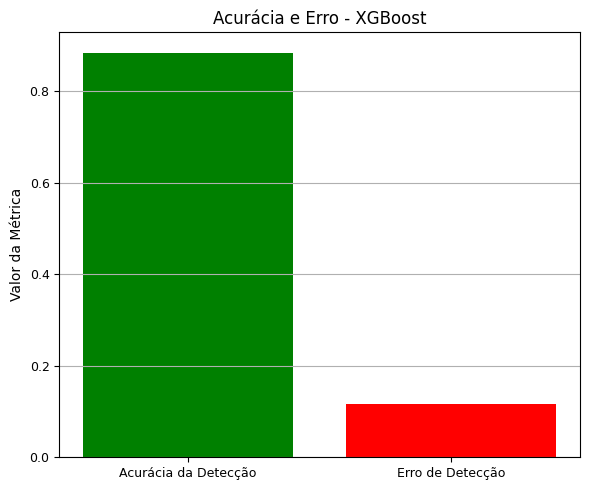

In [ ]:
from xgboost import XGBClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, accuracy_score
import matplotlib.pyplot as plt
from sklearn import metrics

# 1. Padronizar os dados (boa prática para melhorar performance)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 2. Criar e treinar o modelo
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb.fit(X_train_scaled, y_train)

# 3. Fazer previsões
y_pred_xgb = xgb.predict(X_test_scaled)
y_prob_xgb = xgb.predict_proba(X_test_scaled)[:, 1]

# 4. Avaliar o modelo
print("Relatório de Classificação:\n", classification_report(y_test, y_pred_xgb))
conf_matrix = confusion_matrix(y_test, y_pred_xgb)
print("Matriz de Confusão:\n", conf_matrix)
print(f"AUC: {roc_auc_score(y_test, y_prob_xgb):.2f}")
print(f"Acurácia: {accuracy_score(y_test, y_pred_xgb):.2%}")

# 5. Curva ROC
fpr, tpr, _ = roc_curve(y_test, y_prob_xgb)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='XGBoost', color='darkblue', lw=2)
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', lw=2)
plt.xlabel('Taxa de Falsos Positivos', fontsize=10)
plt.ylabel('Taxa de Verdadeiros Positivos', fontsize=10)
plt.title('Curva ROC - XGBoost', fontsize=12)
plt.legend(loc='lower right', fontsize=10)
plt.xticks(fontsize=9)
plt.yticks(fontsize=9)
plt.grid(True)
plt.tight_layout()
plt.show()

# 6. Extração de TP, TN, FP, FN
TP = conf_matrix[1, 1]
TN = conf_matrix[0, 0]
FP = conf_matrix[0, 1]
FN = conf_matrix[1, 0]

print(f"Verdadeiros Positivos (TP): {TP}")
print(f"Verdadeiros Negativos (TN): {TN}")
print(f"Falsos Positivos (FP): {FP}")
print(f"Falsos Negativos (FN): {FN}")

# 7. Acurácia e erro
detection_accuracy = accuracy_score(y_test, y_pred_xgb)
detection_error = 1 - detection_accuracy

print(f"Acurácia da Detecção: {detection_accuracy:.2%}")
print(f"Erro de Detecção: {detection_error:.2%}")

# 8. Limiar manual (threshold)
threshold = 0.5
y_pred_xgb_bin = (y_prob_xgb > threshold).astype(int)

# 9. Gráfico de barras com acurácia e erro
accuracy = metrics.accuracy_score(y_test, y_pred_xgb_bin)
error = 1 - accuracy

labels = ['Acurácia da Detecção', 'Erro de Detecção']
values = [accuracy, error]

plt.figure(figsize=(6, 5))
plt.bar(labels, values, color=['green', 'red'])
plt.ylabel('Valor da Métrica', fontsize=10)
plt.title('Acurácia e Erro - XGBoost', fontsize=12)
plt.xticks(fontsize=9)
plt.yticks(fontsize=9)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

# **9.6- SVM**

In [ ]:
from sklearn.svm import SVC
svm = SVC(kernel='rbf', probability=True, random_state=42)

In [ ]:
#Treinando o modelo
svm.fit(X_train,y_train)

SVC(probability=True, random_state=42)

In [ ]:
#Previsões
y_pred_svm = svm.predict(X_test)

In [ ]:
#Acurácia
accuracy_score(y_test,y_pred_svm)

0.8875786163522013

AUC: 0.95
Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.90      0.94      0.92       877
           1       0.85      0.78      0.81       395

    accuracy                           0.89      1272
   macro avg       0.88      0.86      0.87      1272
weighted avg       0.89      0.89      0.89      1272



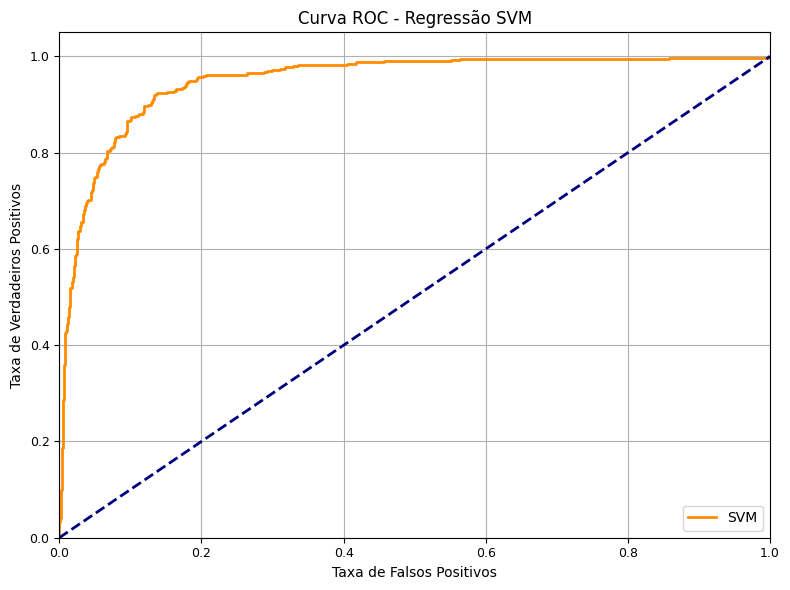

Verdadeiro Positivo (TP): 308
Verdadeiro Negativo (TN): 821
Falso Positivo (FP): 56
Falso Negativo (FN): 87
Matriz de Confusão:
[[821  56]
 [ 87 308]]
Acurácia da Detecção: 88.76%
Erro de Detecção: 11.24%


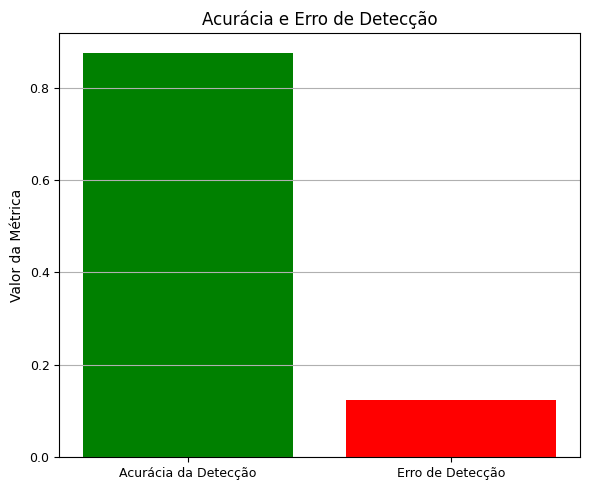

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import roc_auc_score, roc_curve, precision_score, f1_score, recall_score, classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
from sklearn import metrics

# Treinando o modelo SVM
svm_model = SVC(kernel='rbf', probability=True, random_state=42)
svm_model.fit(X_train, y_train)

# Previsão com SVM
y_pred_svm = svm_model.predict(X_test)

# AUC
y_prob_svm = svm_model.decision_function(X_test)
roc_auc = roc_auc_score(y_test, y_prob_svm)

# Métricas principais
print(f'AUC: {roc_auc:.2f}')
precision = precision_score(y_test, y_pred_svm)
f1 = f1_score(y_test, y_pred_svm)
recall = recall_score(y_test, y_pred_svm)

# Relatório de Classificação
class_report = classification_report(y_test, y_pred_svm)
print("Relatório de Classificação:\n", class_report)

# Curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_prob_svm)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='SVM')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taxa de Falsos Positivos', fontsize=10)
plt.ylabel('Taxa de Verdadeiros Positivos', fontsize=10)
plt.title('Curva ROC - Regressão SVM', fontsize=12)
plt.legend(loc="lower right", fontsize=10)
plt.xticks(fontsize=9)
plt.yticks(fontsize=9)
plt.grid(True)
plt.tight_layout()
plt.show()

# Matriz de confusão
conf_matrix = confusion_matrix(y_test, y_pred_svm)
TP = conf_matrix[1, 1]
TN = conf_matrix[0, 0]
FP = conf_matrix[0, 1]
FN = conf_matrix[1, 0]

print(f"Verdadeiro Positivo (TP): {TP}")
print(f"Verdadeiro Negativo (TN): {TN}")
print(f"Falso Positivo (FP): {FP}")
print(f"Falso Negativo (FN): {FN}")

# Acurácia e Erro
detection_accuracy = accuracy_score(y_test, y_pred_svm)
detection_error = 1 - detection_accuracy

print(f"Matriz de Confusão:\n{conf_matrix}")
print(f"Acurácia da Detecção: {detection_accuracy:.2%}")
print(f"Erro de Detecção: {detection_error:.2%}")

# Ajustando limiar
threshold = 0.5
y_pred2 = (y_prob_svm > threshold).astype(int)

# Acurácia com limiar
accuracy = metrics.accuracy_score(y_test, y_pred2)
error = 1 - accuracy

# Gráfico de barras
labels = ['Acurácia da Detecção', 'Erro de Detecção']
values = [accuracy, error]

plt.figure(figsize=(6, 5))
plt.bar(labels, values, color=['green', 'red'])
plt.ylabel('Valor da Métrica', fontsize=10)
plt.title('Acurácia e Erro de Detecção', fontsize=12)
plt.xticks(fontsize=9)
plt.yticks(fontsize=9)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


# **9.7- Redes Neurais**

Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.89      0.91      0.90       877
           1       0.78      0.75      0.77       395

    accuracy                           0.86      1272
   macro avg       0.84      0.83      0.83      1272
weighted avg       0.86      0.86      0.86      1272

Matriz de Confusão:
 [[795  82]
 [ 97 298]]
AUC: 0.93
Acurácia: 85.93%


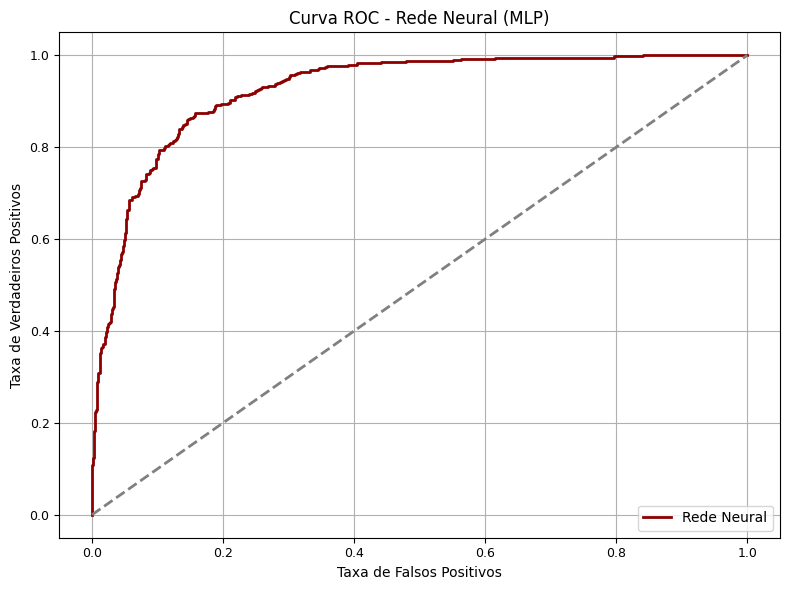

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, accuracy_score
import matplotlib.pyplot as plt

# 1. Escalar os dados (muito importante para redes neurais)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 2. Criar a rede neural
mlp = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=1000, random_state=42)

# 3. Treinar
mlp.fit(X_train_scaled, y_train)

# 4. Prever
y_pred_mlp = mlp.predict(X_test_scaled)
y_prob_mlp = mlp.predict_proba(X_test_scaled)[:, 1]

# 5. Avaliar
print("Relatório de Classificação:\n", classification_report(y_test, y_pred_mlp))
print("Matriz de Confusão:\n", confusion_matrix(y_test, y_pred_mlp))
print(f"AUC: {roc_auc_score(y_test, y_prob_mlp):.2f}")
print(f"Acurácia: {accuracy_score(y_test, y_pred_mlp):.2%}")

# 6. Curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_prob_mlp)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkred', lw=2, label='Rede Neural')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlabel('Taxa de Falsos Positivos', fontsize=10)
plt.ylabel('Taxa de Verdadeiros Positivos', fontsize=10)
plt.title('Curva ROC - Rede Neural (MLP)', fontsize=12)
plt.legend(loc="lower right", fontsize=10)
plt.xticks(fontsize=9)
plt.yticks(fontsize=9)
plt.grid(True)
plt.tight_layout()
plt.show()


# **9.8- K-Nearest Neighbors (KNN)**

Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.87      0.93      0.90       877
           1       0.81      0.68      0.74       395

    accuracy                           0.85      1272
   macro avg       0.84      0.80      0.82      1272
weighted avg       0.85      0.85      0.85      1272

Matriz de Confusão:
 [[816  61]
 [127 268]]
AUC: 0.9138951835226536
Acurácia: 0.8522012578616353


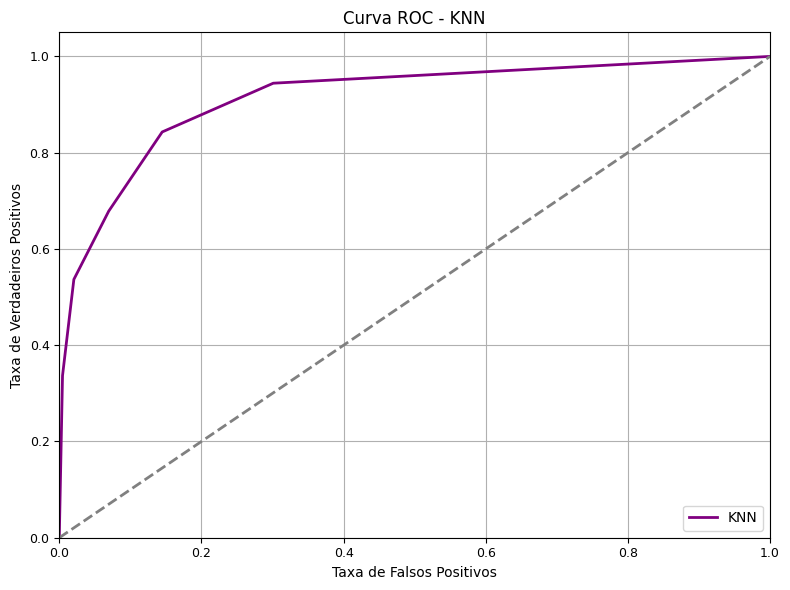

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, accuracy_score
import matplotlib.pyplot as plt

# 1. Escalar os dados (muito importante para o KNN)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 2. Criar e treinar o modelo KNN
knn = KNeighborsClassifier(n_neighbors=5)  # você pode testar com outros valores de K
knn.fit(X_train_scaled, y_train)

# 3. Fazer previsões
y_pred_knn = knn.predict(X_test_scaled)
y_prob_knn = knn.predict_proba(X_test_scaled)[:, 1]

# 4. Avaliar o modelo
print("Relatório de Classificação:\n", classification_report(y_test, y_pred_knn))
print("Matriz de Confusão:\n", confusion_matrix(y_test, y_pred_knn))
print("AUC:", roc_auc_score(y_test, y_prob_knn))
print("Acurácia:", accuracy_score(y_test, y_pred_knn))

# 5. Curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_prob_knn)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='purple', lw=2, label='KNN')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taxa de Falsos Positivos', fontsize=10)
plt.ylabel('Taxa de Verdadeiros Positivos', fontsize=10)
plt.title('Curva ROC - KNN', fontsize=12)
plt.legend(loc="lower right", fontsize=10)
plt.xticks(fontsize=9)
plt.yticks(fontsize=9)
plt.grid(True)
plt.tight_layout()
plt.show()


# **9.9-Extra Trees Classifier**

              precision    recall  f1-score   support

           0       0.90      0.94      0.92       877
           1       0.85      0.78      0.81       395

    accuracy                           0.89      1272
   macro avg       0.88      0.86      0.87      1272
weighted avg       0.89      0.89      0.89      1272

Acurácia: 0.8891509433962265


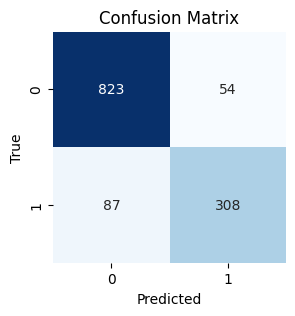

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Creating an instance of Extra Trees Classifier
etc_model = ExtraTreesClassifier()
etc_model.fit(X_train, y_train)

# Making predictions
etc_y_pred = etc_model.predict(X_test)

# Checking score
ETC = accuracy_score(y_test, etc_y_pred)

# Printing Classification Report
print(classification_report(y_test, etc_y_pred))

print("Acurácia:", accuracy_score(y_test, etc_y_pred))

# Plotting Confusion Matrix (3x3 size)
cm = confusion_matrix(y_test, etc_y_pred)
plt.figure(figsize=(3, 3))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# **10- Comparando os Modelos**

In [ ]:

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Criar dicionário com os nomes dos modelos e suas previsões
model_names = ['Regressão Logística', 'Árvore de Decisão', 'Randon Forest', 'Gradient Boosting', 'XGBoost', 'SVM', 'Rede Neural','KNN']
y_preds = [y_pred_rl, y_pred_ad, y_pred_rf, y_pred_gb, y_pred_xgb, y_pred_svm, y_pred_mlp, y_pred_knn]
y_probs = [y_prob_rl, y_prob_ad, y_prob_rf, y_prob_gb, y_prob_xgb, y_prob_svm, y_prob_mlp, y_prob_knn]

# Calcular as métricas
metrics = {
    'Modelo': [],
    'Acurácia': [],
    'AUC': [],
    'Precisão': [],
    'Recall': [],
    'F1-Score': []
}

for i in range(len(model_names)):
    metrics['Modelo'].append(model_names[i])
    metrics['Acurácia'].append(round(accuracy_score(y_test, y_preds[i]), 4))
    metrics['AUC'].append(round(roc_auc_score(y_test, y_probs[i]), 4))
    metrics['Precisão'].append(round(precision_score(y_test, y_preds[i]), 4))
    metrics['Recall'].append(round(recall_score(y_test, y_preds[i]), 4))
    metrics['F1-Score'].append(round(f1_score(y_test, y_preds[i]), 4))

# Criar DataFrame
final_data = pd.DataFrame(metrics)

# Mostrar tabela ordenada pela AUC ou qualquer outra métrica
final_data = final_data.sort_values(by='AUC', ascending=False).reset_index(drop=True)
final_data


,Modelo,Acurácia,AUC,Precisão,Recall,F1-Score
0,Gradient Boosting,0.90,0.96,0.83,0.87,0.85
1,Regressão Logística,0.89,0.95,0.85,0.79,0.82
2,Randon Forest,0.91,0.95,0.83,0.87,0.85
3,SVM,0.89,0.95,0.85,0.78,0.81
4,XGBoost,0.88,0.95,0.81,0.81,0.81
5,Rede Neural,0.86,0.93,0.78,0.75,0.77
6,KNN,0.85,0.91,0.81,0.68,0.74
7,Árvore de Decisão,0.85,0.83,0.75,0.78,0.77


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import time

# Criar dicionário com os nomes dos modelos e suas previsões
model_names = ['Regressão Logística', 'Árvore de Decisão', 'Randon Forest', 'Gradient Boosting', 'XGBoost', 'SVM', 'Rede Neural','KNN']
models_list = [log_model, dt, rf, gb, xgb, svm_model, mlp, knn] # Adiciona os objetos dos modelos
y_preds = [y_pred_rl, y_pred_ad, y_pred_rf, y_pred_gb, y_pred_xgb, y_pred_svm, y_pred_mlp, y_pred_knn]
y_probs = [y_prob_rl, y_prob_ad, y_prob_rf, y_prob_gb, y_prob_xgb, y_prob_svm, y_prob_mlp, y_prob_knn]

# Calcular as métricas
metrics = {
    'Modelo': [],
    'Acurácia': [],
    'AUC': [],
    'Precisão': [],
    'Recall': [],
    'F1-Score': [],
    'Tempo (s)': [] # Adiciona a coluna de tempo
}

for i in range(len(model_names)):
    # Medir o tempo de treino e previsão
    start_time = time.time()
    # Re-treinar o modelo para medir o tempo completo (treino + previsão)
    models_list[i].fit(X_train, y_train) # Use X_train e y_train para treinar
    y_pred = models_list[i].predict(X_test)
    if hasattr(models_list[i], 'predict_proba'):
      y_prob = models_list[i].predict_proba(X_test)[:, 1]
    else: # Para modelos como SVM que usam decision_function para AUC
      y_prob = models_list[i].decision_function(X_test)
    end_time = time.time()
    elapsed_time = end_time - start_time


    metrics['Modelo'].append(model_names[i])
    metrics['Acurácia'].append(round(accuracy_score(y_test, y_pred), 4))
    metrics['AUC'].append(round(roc_auc_score(y_test, y_prob), 4))
    metrics['Precisão'].append(round(precision_score(y_test, y_pred), 4))
    metrics['Recall'].append(round(recall_score(y_test, y_pred), 4))
    metrics['F1-Score'].append(round(f1_score(y_test, y_pred), 4))
    metrics['Tempo (s)'].append(round(elapsed_time, 4)) # Adiciona o tempo

# Criar DataFrame
final_data = pd.DataFrame(metrics)

# Mostrar tabela ordenada pela AUC ou qualquer outra métrica
final_data = final_data.sort_values(by='AUC', ascending=False).reset_index(drop=True)
final_data

,Modelo,Acurácia,AUC,Precisão,Recall,F1-Score,Tempo (s)
0,Gradient Boosting,0.90,0.96,0.83,0.87,0.85,0.83
1,Regressão Logística,0.89,0.95,0.85,0.79,0.82,0.03
2,Randon Forest,0.91,0.95,0.83,0.87,0.85,0.88
3,SVM,0.89,0.95,0.85,0.78,0.81,0.96
4,XGBoost,0.88,0.95,0.81,0.81,0.81,0.16
5,Rede Neural,0.86,0.93,0.79,0.76,0.78,13.46
6,KNN,0.86,0.91,0.83,0.70,0.76,0.16
7,Árvore de Decisão,0.86,0.84,0.77,0.79,0.78,0.05


## **10.1- Comparação de acurácia entre modelos - Gráfico de barras**

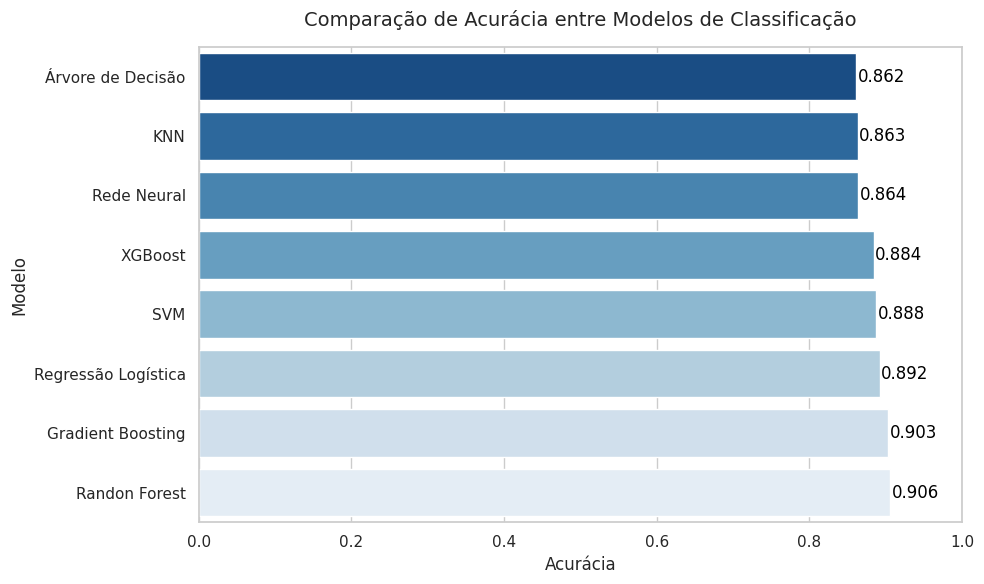

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ordenar os modelos pela acurácia (só para o gráfico ficar organizado)
final_data_sorted = final_data.sort_values(by='Acurácia', ascending=True)

# Definir o estilo do gráfico
sns.set(style="whitegrid")

# Criar o gráfico de barras horizontal
plt.figure(figsize=(10, 6))
sns.barplot(
    x='Acurácia',
    y='Modelo',
    data=final_data_sorted,
    palette='Blues_r'
)

# Adicionar os valores de acurácia nas barras
for i, v in enumerate(final_data_sorted['Acurácia']):
    plt.text(v + 0.002, i, f"{v:.3f}", color='black', va='center')

# Títulos e rótulos
plt.title('Comparação de Acurácia entre Modelos de Classificação', fontsize=14, pad=15)
plt.xlabel('Acurácia', fontsize=12)
plt.ylabel('Modelo', fontsize=12)

plt.xlim(0, 1)  # Limita o eixo X entre 0 e 1 (já que é acurácia)
plt.tight_layout()
plt.show()


# **10.2- Curva ROC comparativa - Múltiplas curvas**

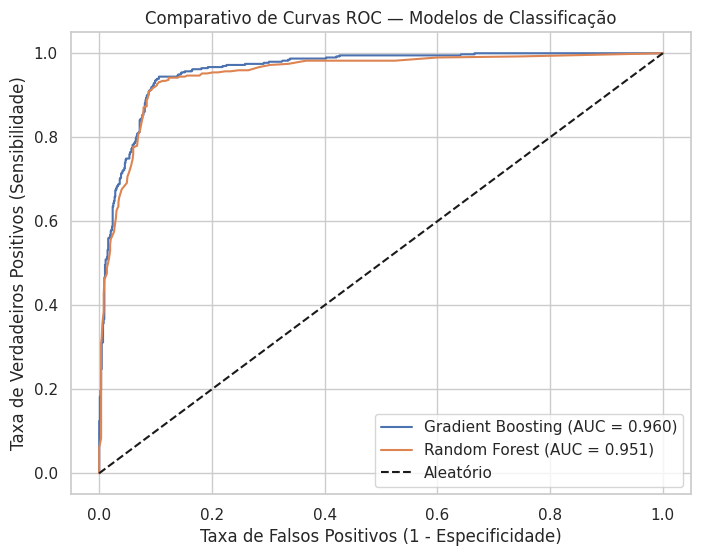

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression

# Supondo que você já tenha X_train, X_test, y_train, y_test

# ===== 1. Treinar os modelos =====
gb = GradientBoostingClassifier(random_state=42)
rf = RandomForestClassifier(random_state=42)

gb.fit(X_train, y_train)
rf.fit(X_train, y_train)

# ===== 2. Calcular probabilidades =====
y_pred_gb = gb.predict_proba(X_test)[:, 1]
y_pred_rf = rf.predict_proba(X_test)[:, 1]

# ===== 3. Calcular curvas ROC =====
fpr_gb, tpr_gb, _ = roc_curve(y_test, y_pred_gb)
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred_rf)

roc_auc_gb = auc(fpr_gb, tpr_gb)
roc_auc_rf = auc(fpr_rf, tpr_rf)

# ===== 4. Plot =====
plt.figure(figsize=(8,6))
plt.plot(fpr_gb, tpr_gb, label=f'Gradient Boosting (AUC = {roc_auc_gb:.3f})')
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {roc_auc_rf:.3f})')
plt.plot([0, 1], [0, 1], 'k--', label='Aleatório')

plt.title('Comparativo de Curvas ROC — Modelos de Classificação')
plt.xlabel('Taxa de Falsos Positivos (1 - Especificidade)')
plt.ylabel('Taxa de Verdadeiros Positivos (Sensibilidade)')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


# **11-Buscando o ponto Ótimo**

# **11.1-Random Forest + GridSearchCV**

In [ ]:
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.model_selection import GridSearchCV
# from sklearn.metrics import (
#     classification_report, confusion_matrix, roc_auc_score,
#     accuracy_score, precision_score, recall_score, f1_score
# )
# import time

# # Definir o modelo base
# rf = RandomForestClassifier(random_state=42)

# # Definir o grid de hiperparâmetros que vamos testar
# param_grid = {
#     'n_estimators': [100, 200, 300],        # Número de árvores
#     'max_depth': [None, 5, 10, 20],         # Profundidade máxima
#     'min_samples_split': [2, 5, 10],        # Mínimo de amostras para dividir um nó
#     'min_samples_leaf': [1, 2, 4],          # Mínimo de amostras em uma folha
#     'max_features': ['sqrt', 'log2']        # Quantidade de features consideradas em cada split
# }

# # Configurar o GridSearch
# grid_search = GridSearchCV(
#     estimator=rf,
#     param_grid=param_grid,
#     cv=5,                      # 5-fold cross-validation
#     scoring='accuracy',        # Pode mudar para 'roc_auc', 'f1' etc.
#     n_jobs=-1,                 # Usar todos os núcleos do processador
#     verbose=2
# )

# # Rodar a busca
# start_opt = time.time()
# grid_search.fit(X_train, y_train)
# end_opt = time.time()
# time_opt = round(end_opt - start_opt, 2)

# # Mostrar os melhores hiperparâmetros
# print("Melhores hiperparâmetros encontrados:")
# print(grid_search.best_params_)

# # Avaliar no conjunto de teste
# best_rf = grid_search.best_estimator_
# y_pred = best_rf.predict(X_test)
# y_prob = best_rf.predict_proba(X_test)[:, 1]

# print("\nRelatório de Classificação:")
# print(classification_report(y_test, y_pred))

# print("Matriz de Confusão:")
# print(confusion_matrix(y_test, y_pred))

# # ----------- Modelo Default (sem otimização) -----------
# start_default = time.time()
# rf_default = RandomForestClassifier(random_state=42)
# rf_default.fit(X_train, y_train)
# end_default = time.time()
# time_default = round(end_default - start_default, 2)

# y_pred_default = rf_default.predict(X_test)
# y_prob_default = rf_default.predict_proba(X_test)[:, 1]

# # ----------- Comparação das métricas -----------
# metrics = {
#     'Modelo': ['Random Forest (Default)', 'Random Forest (Otimizado)'],
#     'Acurácia': [
#         round(accuracy_score(y_test, y_pred_default), 4),
#         round(accuracy_score(y_test, y_pred), 4)
#     ],
#     'AUC': [
#         round(roc_auc_score(y_test, y_prob_default), 4),
#         round(roc_auc_score(y_test, y_prob), 4)
#     ],
#     'Precisão': [
#         round(precision_score(y_test, y_pred_default), 4),
#         round(precision_score(y_test, y_pred), 4)
#     ],
#     'Recall': [
#         round(recall_score(y_test, y_pred_default), 4),
#         round(recall_score(y_test, y_pred), 4)
#     ],
#     'F1-Score': [
#         round(f1_score(y_test, y_pred_default), 4),
#         round(f1_score(y_test, y_pred), 4)
#     ],
#     'Tempo (s)': [time_default, time_opt]
# }


# # Criar DataFrame para exibir a tabela
# results_df = pd.DataFrame(metrics)

# # Mostrar tabela ordenada pela AUC ou qualquer outra métrica
# results_df = results_df.sort_values(by='AUC', ascending=False).reset_index(drop=True)
# results_df


# **11.2-Random Forest + RandomizedSearchCV**

In [ ]:
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.model_selection import RandomizedSearchCV
# from sklearn.metrics import (
#     classification_report, confusion_matrix, roc_auc_score,
#     accuracy_score, precision_score, recall_score, f1_score
# )
# import numpy as np

# # Modelo base
# rf = RandomForestClassifier(random_state=42)

# # Espaço de busca dos hiperparâmetros
# param_dist = {
#     'n_estimators': [100, 200, 300, 500],          # número de árvores
#     'max_depth': [None, 10, 20, 30, 50],           # profundidade máxima
#     'min_samples_split': [2, 5, 10],               # min. amostras p/ dividir nó
#     'min_samples_leaf': [1, 2, 4],                 # min. amostras em uma folha
#     'max_features': ['auto', 'sqrt', 'log2'],      # número de features p/ split
#     'bootstrap': [True, False]                     # usar bootstrap ou não
# }

# # Configurar o RandomizedSearch
# random_search = RandomizedSearchCV(
#     estimator=rf,
#     param_distributions=param_dist,
#     n_iter=50,                  # número de combinações aleatórias testadas
#     cv=5,                       # validação cruzada
#     scoring='accuracy',         # pode trocar por 'roc_auc', 'f1', etc.
#     random_state=42,
#     n_jobs=-1,                  # usar todos os núcleos
#     verbose=2
# )

# # Treinar
# random_search.fit(X_train, y_train)

# # Melhor conjunto de hiperparâmetros
# print("Melhores hiperparâmetros encontrados:")
# print(random_search.best_params_)

# # Avaliar no conjunto de teste
# best_rf = random_search.best_estimator_
# y_pred = best_rf.predict(X_test)
# y_prob = best_rf.predict_proba(X_test)[:, 1]

# print("\nRelatório de Classificação:")
# print(classification_report(y_test, y_pred))

# print("Matriz de Confusão:")
# print(confusion_matrix(y_test, y_pred))

# # ----------- Modelo Default (sem otimização) -----------
# rf_default = RandomForestClassifier(random_state=42)
# rf_default.fit(X_train, y_train)

# y_pred_default = rf_default.predict(X_test)
# y_prob_default = rf_default.predict_proba(X_test)[:, 1]

# # ----------- Modelo Otimizado (com RandomizedSearchCV) -----------
# best_rf = random_search.best_estimator_

# y_pred_opt = best_rf.predict(X_test)
# y_prob_opt = best_rf.predict_proba(X_test)[:, 1]

# # ----------- Comparação das métricas -----------
# metrics = {
#     'Modelo': ['Random Forest (Default)', 'Random Forest (Otimizado)'],
#     'Acurácia': [
#         round(accuracy_score(y_test, y_pred_default), 4),
#         round(accuracy_score(y_test, y_pred_opt), 4)
#     ],
#     'AUC': [
#         round(roc_auc_score(y_test, y_prob_default), 4),
#         round(roc_auc_score(y_test, y_prob_opt), 4)
#     ],
#     'Precisão': [
#         round(precision_score(y_test, y_pred_default), 4),
#         round(precision_score(y_test, y_pred_opt), 4)
#     ],
#     'Recall': [
#         round(recall_score(y_test, y_pred_default), 4),
#         round(recall_score(y_test, y_pred_opt), 4)
#     ],
#     'F1-Score': [
#         round(f1_score(y_test, y_pred_default), 4),
#         round(f1_score(y_test, y_pred_opt), 4)
#     ]
# }


# # Criar DataFrame para exibir a tabela
# results_df = pd.DataFrame(metrics)

# # Mostrar tabela ordenada pela AUC ou qualquer outra métrica
# results_df = results_df.sort_values(by='AUC', ascending=False).reset_index(drop=True)
# results_df


# **11.3-Gradient Boosting + GridSearchCV**

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, accuracy_score, precision_score, recall_score, f1_score
import pandas as pd
import time

# Definir o modelo base
gb = GradientBoostingClassifier(random_state=42)

# Definir o grid de hiperparâmetros
param_grid = {
    'n_estimators': [50, 100],
    'learning_rate': [0.05, 0.1],
    'max_depth': [3, 5],
    'min_samples_split': [2, 5, 10],     # min. amostras para dividir um nó
    'min_samples_leaf': [1, 2, 4],       # min. amostras em uma folha
    'subsample': [0.8, 1.0]              # proporção dos dados usados em cada árvore
}

# Configurar o GridSearch
grid_search = GridSearchCV(
    estimator=gb,
    param_grid=param_grid,
    cv=5,                      # validação cruzada
    scoring='recall',          # pode trocar por 'roc_auc', 'f1', etc.
    n_jobs=-1,                 # usar todos os núcleos do processador
    verbose=2
)

# Rodar a busca
start_opt = time.time()
grid_search.fit(X_train, y_train)
end_opt = time.time()
time_opt = round(end_opt - start_opt, 2)

# Mostrar os melhores hiperparâmetros
print("Melhores hiperparâmetros encontrados:")
print(grid_search.best_params_)

# Avaliar no conjunto de teste
best_gb = grid_search.best_estimator_
y_pred = best_gb.predict(X_test)
y_prob = best_gb.predict_proba(X_test)[:, 1]

print("\nRelatório de Classificação:")
print(classification_report(y_test, y_pred))

print("Matriz de Confusão:")
print(confusion_matrix(y_test, y_pred))

# print("AUC:", roc_auc_score(y_test, y_prob))
# print("Acurácia (validação cruzada):", grid_search.best_score_)

# ----------- Modelo Default (sem otimização) -----------
start_default = time.time()
gb_default = GradientBoostingClassifier(random_state=42)
gb_default.fit(X_train, y_train)
end_default = time.time()
time_default = round(end_default - start_default, 2)

y_pred_default = gb_default.predict(X_test)
y_prob_default = gb_default.predict_proba(X_test)[:, 1]

# ----------- Comparação das métricas -----------
metrics = {
    'Modelo': ['Gradient Boosting (Default)', 'Gradient Boosting (Otimizado)'],
    'Acurácia': [
        round(accuracy_score(y_test, y_pred_default), 4),
        round(accuracy_score(y_test, y_pred), 4)
    ],
    'AUC': [
        round(roc_auc_score(y_test, y_prob_default), 4),
        round(roc_auc_score(y_test, y_prob), 4)
    ],
    'Precisão': [
        round(precision_score(y_test, y_pred_default), 4),
        round(precision_score(y_test, y_pred), 4)
    ],
    'Recall': [
        round(recall_score(y_test, y_pred_default), 4),
        round(recall_score(y_test, y_pred), 4)
    ],
    'F1-Score': [
        round(f1_score(y_test, y_pred_default), 4),
        round(f1_score(y_test, y_pred), 4)
    ],
    'Tempo (s)': [time_default, time_opt]
}

# Criar DataFrame
results_df = pd.DataFrame(metrics)


# Mostrar tabela ordenada pela AUC ou qualquer outra métrica
results_df = results_df.sort_values(by='AUC', ascending=False).reset_index(drop=True)
results_df



Fitting 5 folds for each of 144 candidates, totalling 720 fits
Melhores hiperparâmetros encontrados:
{'learning_rate': 0.05, 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50, 'subsample': 1.0}

Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.95      0.92      0.93       877
           1       0.83      0.89      0.85       395

    accuracy                           0.91      1272
   macro avg       0.89      0.90      0.89      1272
weighted avg       0.91      0.91      0.91      1272

Matriz de Confusão:
[[803  74]
 [ 45 350]]


,Modelo,Acurácia,AUC,Precisão,Recall,F1-Score,Tempo (s)
0,Gradient Boosting (Default),0.90,0.96,0.83,0.87,0.85,0.63
1,Gradient Boosting (Otimizado),0.91,0.96,0.83,0.89,0.85,330.44


# **11.4-Gradient Boosting + RandomizedSearchCV**

In [ ]:
# from sklearn.ensemble import GradientBoostingClassifier
# from sklearn.model_selection import RandomizedSearchCV
# from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
# import numpy as np

# # Modelo base
# gb = GradientBoostingClassifier(random_state=42)

# # Espaço de busca dos hiperparâmetros
# param_dist = {
#     'n_estimators': [100, 200, 300, 500],       # número de árvores (iterações)
#     'learning_rate': [0.01, 0.05, 0.1, 0.2],   # taxa de aprendizado
#     'max_depth': [3, 4, 5, 6, 8],              # profundidade máxima das árvores
#     'min_samples_split': [2, 5, 10],           # mínimo p/ dividir nó
#     'min_samples_leaf': [1, 2, 4],             # mínimo de amostras em uma folha
#     'subsample': [0.6, 0.8, 1.0],              # fração de amostras usadas
#     'max_features': ['sqrt', 'log2', None]     # número de features por split
# }

# # Configurar o RandomizedSearch
# random_search_gb = RandomizedSearchCV(
#     estimator=gb,
#     param_distributions=param_dist,
#     n_iter=50,                  # número de combinações aleatórias
#     cv=5,                       # validação cruzada
#     scoring='accuracy',         # pode trocar para 'roc_auc', 'f1', etc.
#     random_state=42,
#     n_jobs=-1,                  # usa todos os núcleos
#     verbose=2
# )

# # Treinar
# random_search_gb.fit(X_train, y_train)

# # Melhor conjunto de hiperparâmetros
# print("Melhores hiperparâmetros encontrados:")
# print(random_search_gb.best_params_)

# # Avaliar no conjunto de teste
# best_gb = random_search_gb.best_estimator_
# y_pred_gb = best_gb.predict(X_test)
# y_prob_gb = best_gb.predict_proba(X_test)[:, 1]

# print("\nRelatório de Classificação:")
# print(classification_report(y_test, y_pred_gb))

# print("Matriz de Confusão:")
# print(confusion_matrix(y_test, y_pred_gb))

# print("AUC:", roc_auc_score(y_test, y_prob_gb))
# print("Acurácia (validação cruzada):", random_search_gb.best_score_)


# **11- Modelo definido e extraido**

In [ ]:
# # ===========================================
# # 1. Importar pacotes
# # ===========================================
# import joblib
# from sklearn.pipeline import Pipeline
# from sklearn.preprocessing import StandardScaler

# # ===========================================
# # 2. Criar pipeline final
# # ===========================================
# # Aqui estamos juntando a padronização + modelo treinado
# pipeline = Pipeline([
#     ("scaler", StandardScaler()),   # padronização dos dados
#     ("modelo", best_gb)             # Gradient Boosting otimizado
# ])

# # ===========================================
# # 3. Treinar pipeline com os dados já prontos
# # ===========================================
# pipeline.fit(X_train, y_train)

# # ===========================================
# # 4. Salvar pipeline em arquivo .pkl
# # ===========================================
# joblib.dump(pipeline, "modelo_pressao.pkl")

# print("✅ Pipeline e modelo salvos em 'modelo_pressao.pkl'")